# 📌 Why Explainability Matters in Healthcare

In healthcare, decisions made by AI models can have life-altering consequences. Unlike other domains, **trust, transparency, and accountability** are not just nice-to-haves—they are essential.

Let’s consider a simple example:

---

### 🏥 Example: Predicting Risk of Sepsis

A hospital uses an AI model to predict whether a patient is at risk of developing **sepsis** based on electronic health records (EHR). The model flags a patient as "high risk", and the medical team responds by initiating aggressive treatment, including antibiotics and ICU monitoring.

✅ **The prediction is correct** — the patient survives.  
❌ **But the doctors have no idea why** the model made the prediction.

Now consider the opposite:

- The model **fails to flag** a patient who later develops sepsis.
- The doctors, trusting the AI, delay intervention.
- The outcome is tragic.

---

### ⚠️ What’s the problem?

In both scenarios, the **"black-box" nature** of the AI model creates serious risks:

- **Lack of transparency**: Clinicians can't verify or question the model's decision.
- **No accountability**: It’s hard to trace errors back to specific reasoning.
- **Trust deficit**: Clinicians are less likely to adopt or rely on AI tools they don't understand.

---

### 💡 Explainability to the rescue

By making AI decisions **understandable and interpretable**, we can:

- Help clinicians **validate** model outputs against medical knowledge.
- Enable **error analysis** when things go wrong.
- Improve **regulatory acceptance** and **patient safety**.
- Build **trust** between humans and machines.

In short, explainability isn't just a technical feature—it's a **clinical necessity**.



<h1 style="color:red;">Before you start</h1>

## Attach a dataset
You need to attach a dataset to this notebook which we will use in this workshop. It's pretty simple. Just follow the following steps:

<p style="color:red">Not required if you can see the dataset under Input section in the right sidebar.</p>

1. Open the right sidebar if not already open (look for a button with arrow key on bottom right)
2. Next, click "+ Add Input"
3. Select "Datasets" from the button just below the search bar.
4. In the search bar type "Pima Indians Diabetes"
5. Select "Pima Indians Diabetes - UCI Machine Learning" (you may have to press the small "+" button on the right)
6. Close the "Add Input" section by pressing "X" on top-right.

## Enable the accelerator
Platform like Kaggle and Google Colab are useful because they allow us to use GPU (accelerator) for computation which makes running most of the load-intensive models faster. But before we can do that, we need to enable the accelerator. To do so, follow these steps:

1. Press the "Settings" button on the top bar (just below the notebook title)
2. Hover over "Accelerator"
3. Select either "GPU T4 x2" or "GPU P100"
4. Done.

## Enable Internet
Notebooks are also a good choice for prototyping/workshops because a lot of stuff needs to be downloaded on the go. Kaggle/Google provides excellent downloading speeds. On Kaggle, internet is not active by default. Here are the steps to the "Enable Internet" in this notebook:

<p style="color:red">Not required if you can see Internet on under Session Option in the right sidebar.</p>

1. Open the left sidebar and press Home in a new tab.
2. Verify your phone. Click on your profile icon (top-right), go to settings and you'll find the option.
3. Verify your Identity. Again click on your profile icon, go to settings and find the option below "Verify phone".
4. In this window, open the right sidebar if not already open (look for a button with arrow key on bottom right)
5. Click on it then click "Session Options", scroll and voila! there it is! "Enable Internet" button.
   
P.S : First two steps are necessary or else you won't see "Enable Internet" option under Session Options.

# First Steps: Loading a dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

diabetes_df = pd.read_csv('/kaggle/input/diabetes.csv')

# Uncomment the line (put cursor on the line and press Ctrl + /) below if above line fails
# diabetes_df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

diabetes_df.head()

In [ ]:
print(diabetes_df.shape)

# 🧠 Types of Explainability: Global vs Local

When we talk about making AI models explainable, we need to consider **what kind of understanding** we are aiming for. There are two main types:

- **Global Explanations**
- **Local Explanations**

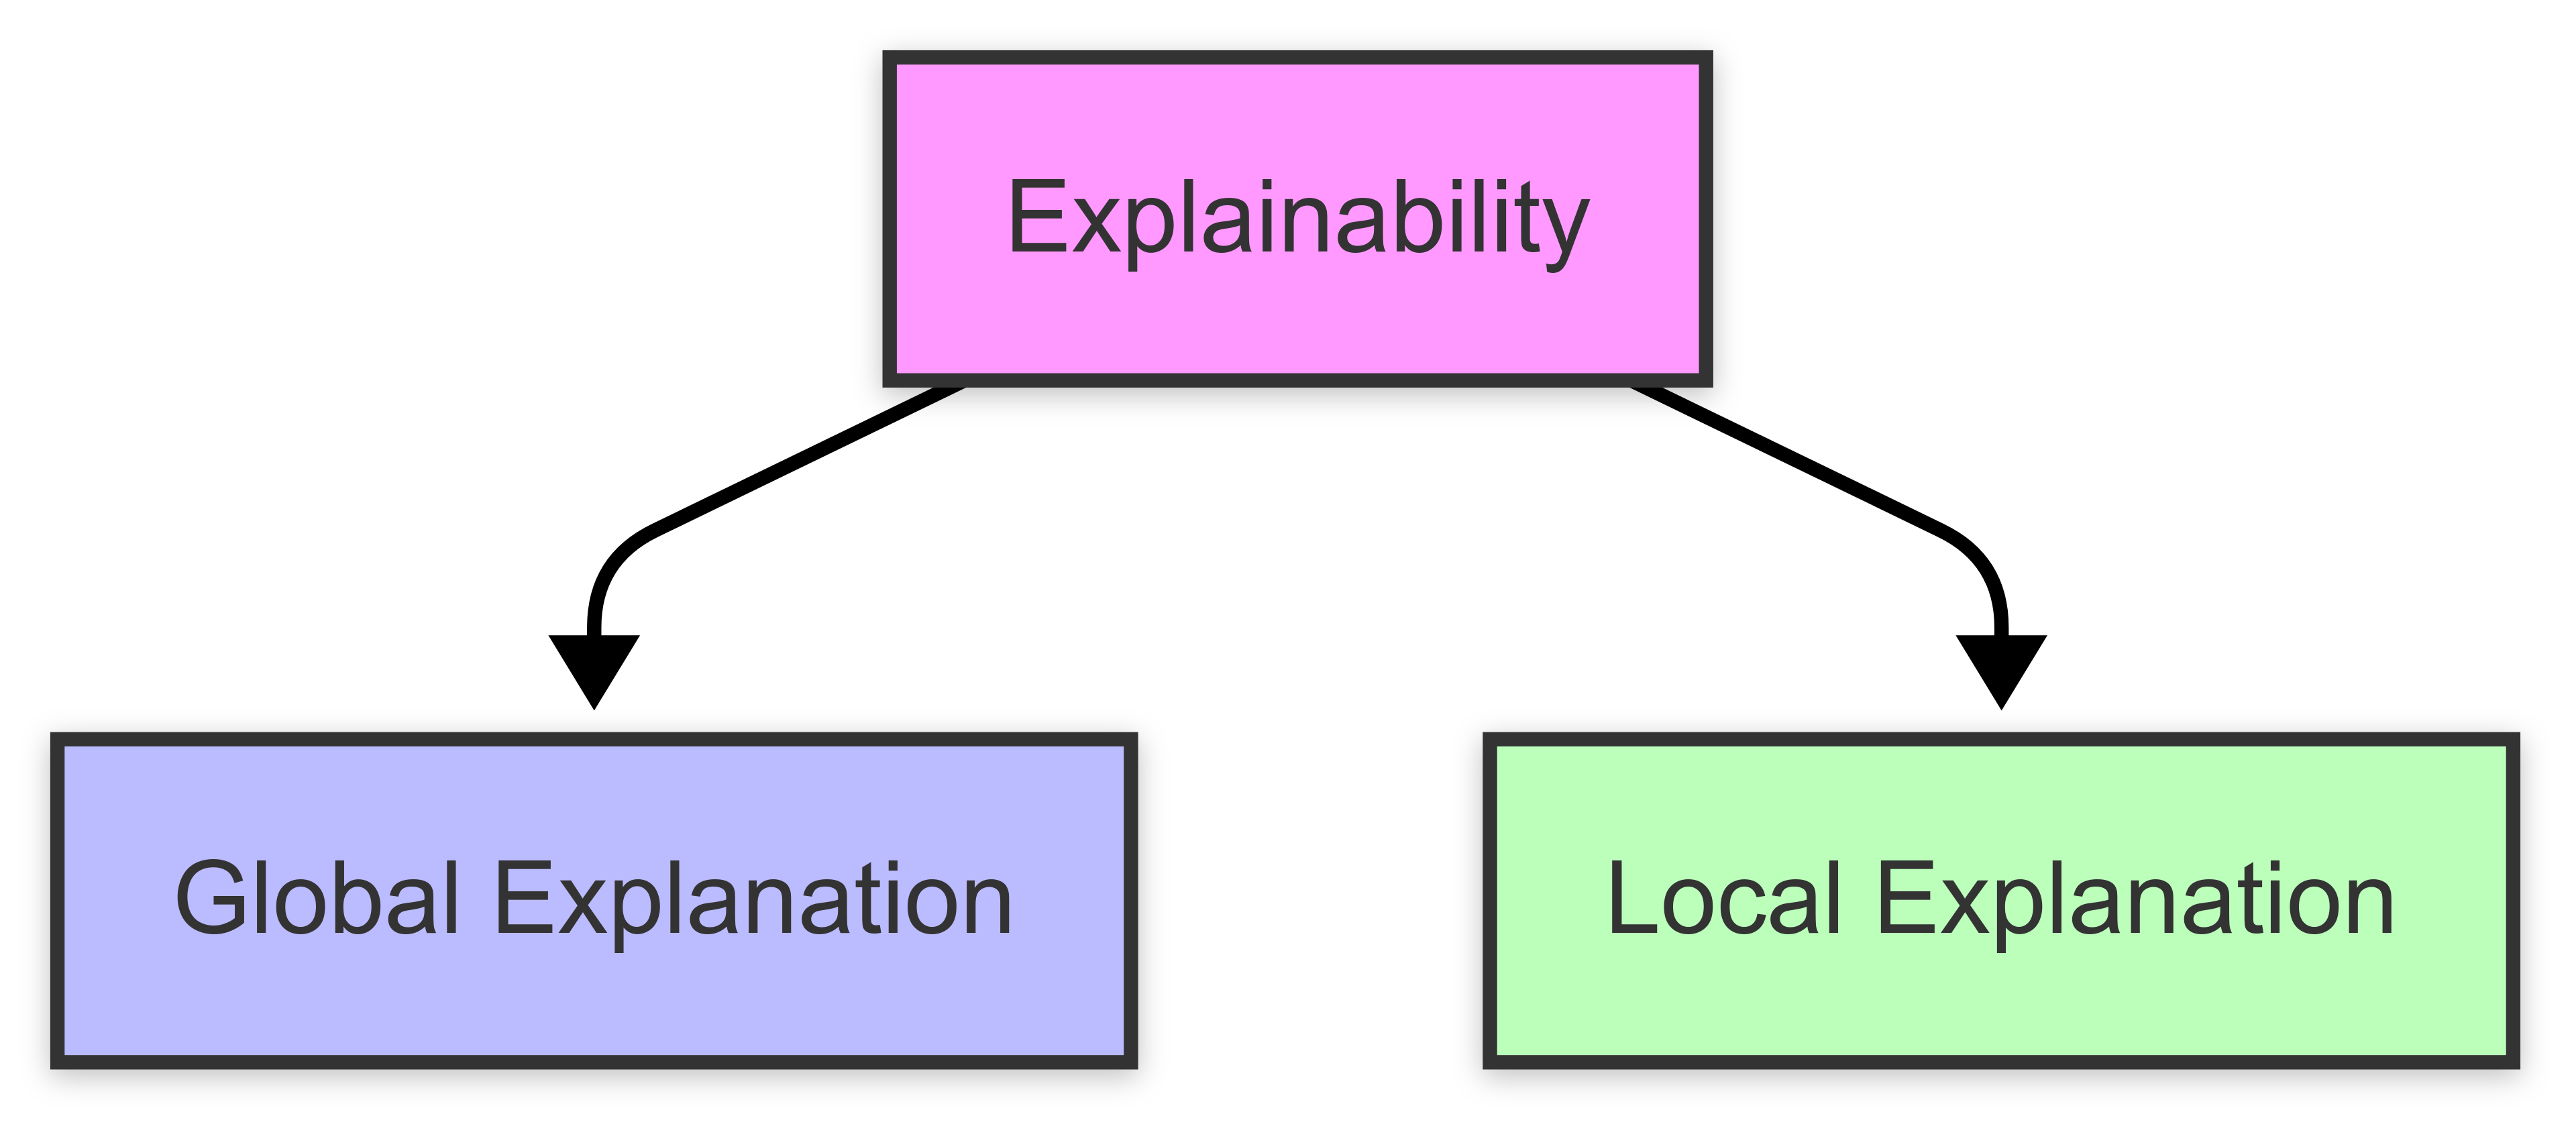


### 🧩 Putting it together

| Type        | Focus                | Use Case Example           |
|-------------|----------------------|-----------------------------|
| Global      | Whole model behavior | Understanding key risk factors for disease across all patients |
| Local       | Single prediction    | Explaining why a specific patient was flagged |

Both perspectives are important—global helps us **trust the model**, while local helps us **trust individual predictions**.


## 🌍 Global Explainability using Logistic Regression

Global explainability refers to **understanding the model as a whole**.

It answers questions like:

- _“What features are generally important for this model?”_  
- _“How does the model make decisions overall?”_  
- _“What are the high-level rules or patterns?”_

### 🩺 Example in Healthcare:

In a model that predicts the risk of heart disease:
> Global explainability might show that **age**, **cholesterol level**, and **smoking status** are the most important features overall.

🧾 This kind of insight is useful for:
- Auditing the model for fairness or bias.
- Communicating with regulators and stakeholders.
- Validating the model against domain knowledge.

---


### Visualization
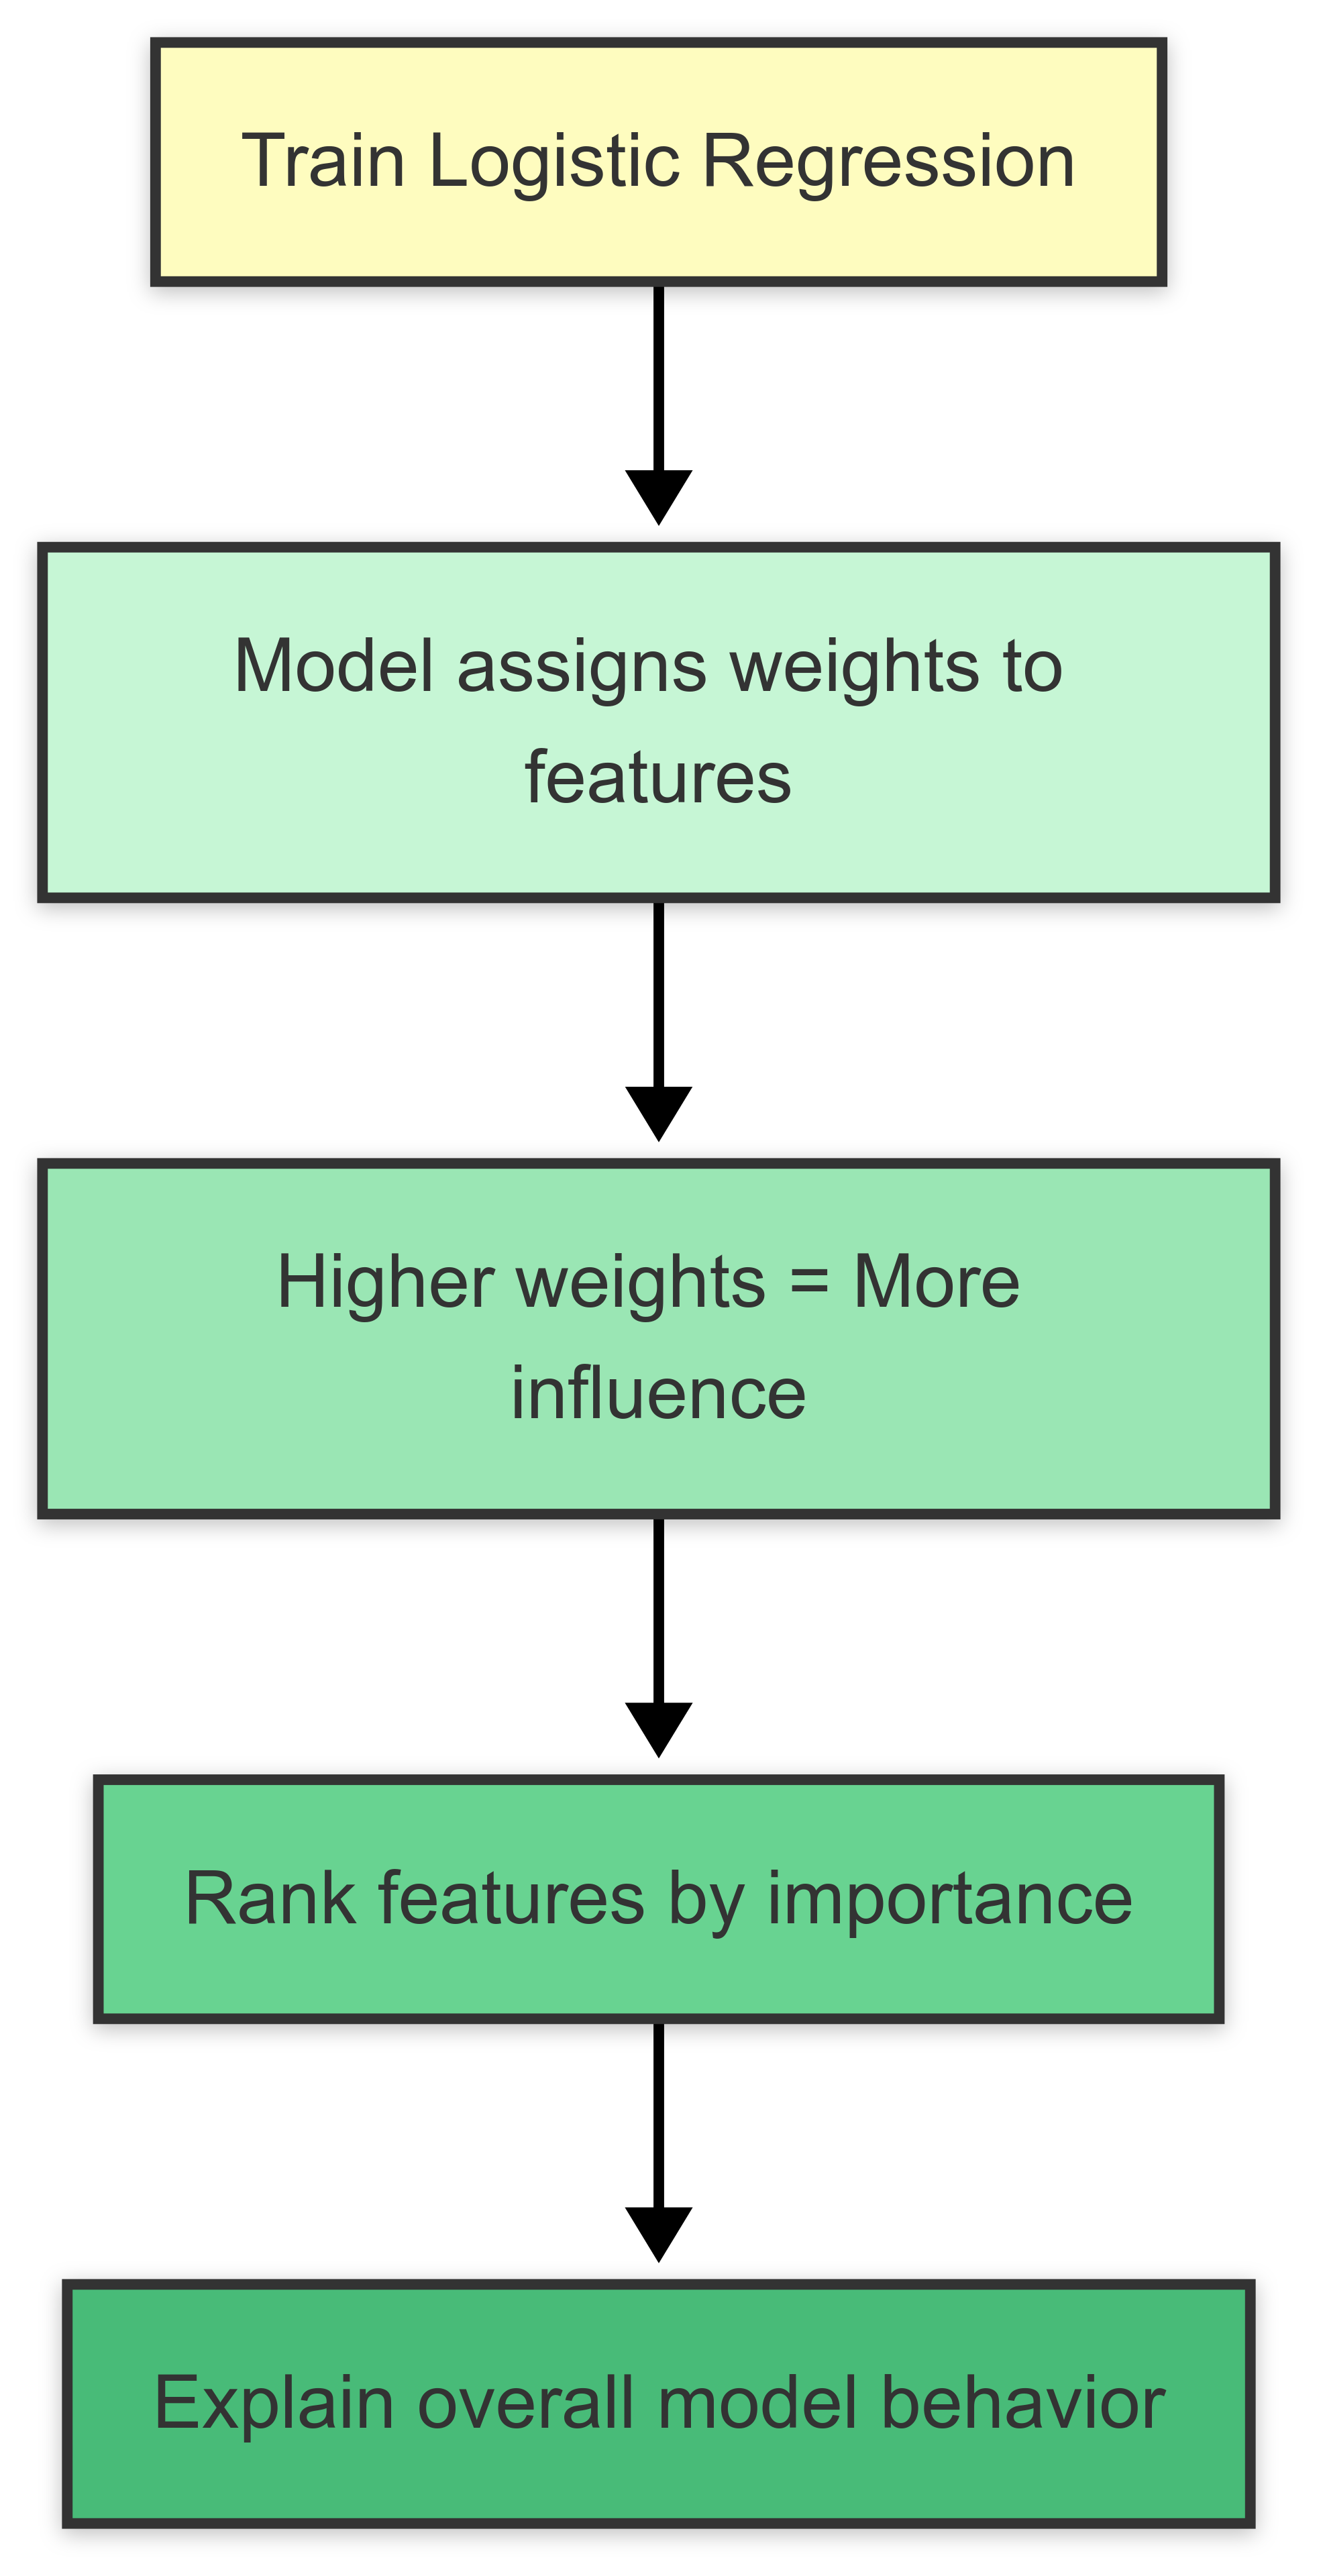

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score

# Features and target
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]

# Split the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Standardize the features e.g. 3.5 -> 0.7
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get predictions for unseen test records
y_pred = model.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

In [ ]:
# Get feature importance
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
}).sort_values(by="Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Coefficient", y="Feature", palette="viridis")
plt.title("Global Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 🔍 Local Explainability using Logistic Regression

Local explainability refers to **understanding why the model made a specific prediction for an individual case**.

It answers questions like:

- _“Why was this patient classified as high-risk?”_  
- _“What factors influenced this particular prediction?”_

### 🩺 Example in Healthcare:

For a specific patient flagged at high risk for diabetes:
> Local explainability might show that **high BMI**, **family history**, and **elevated glucose levels** were the main drivers.

🧾 This is crucial for:
- Clinical decision-making.
- Gaining trust from doctors and patients.
- Identifying and correcting individual misclassifications.

### Visualization
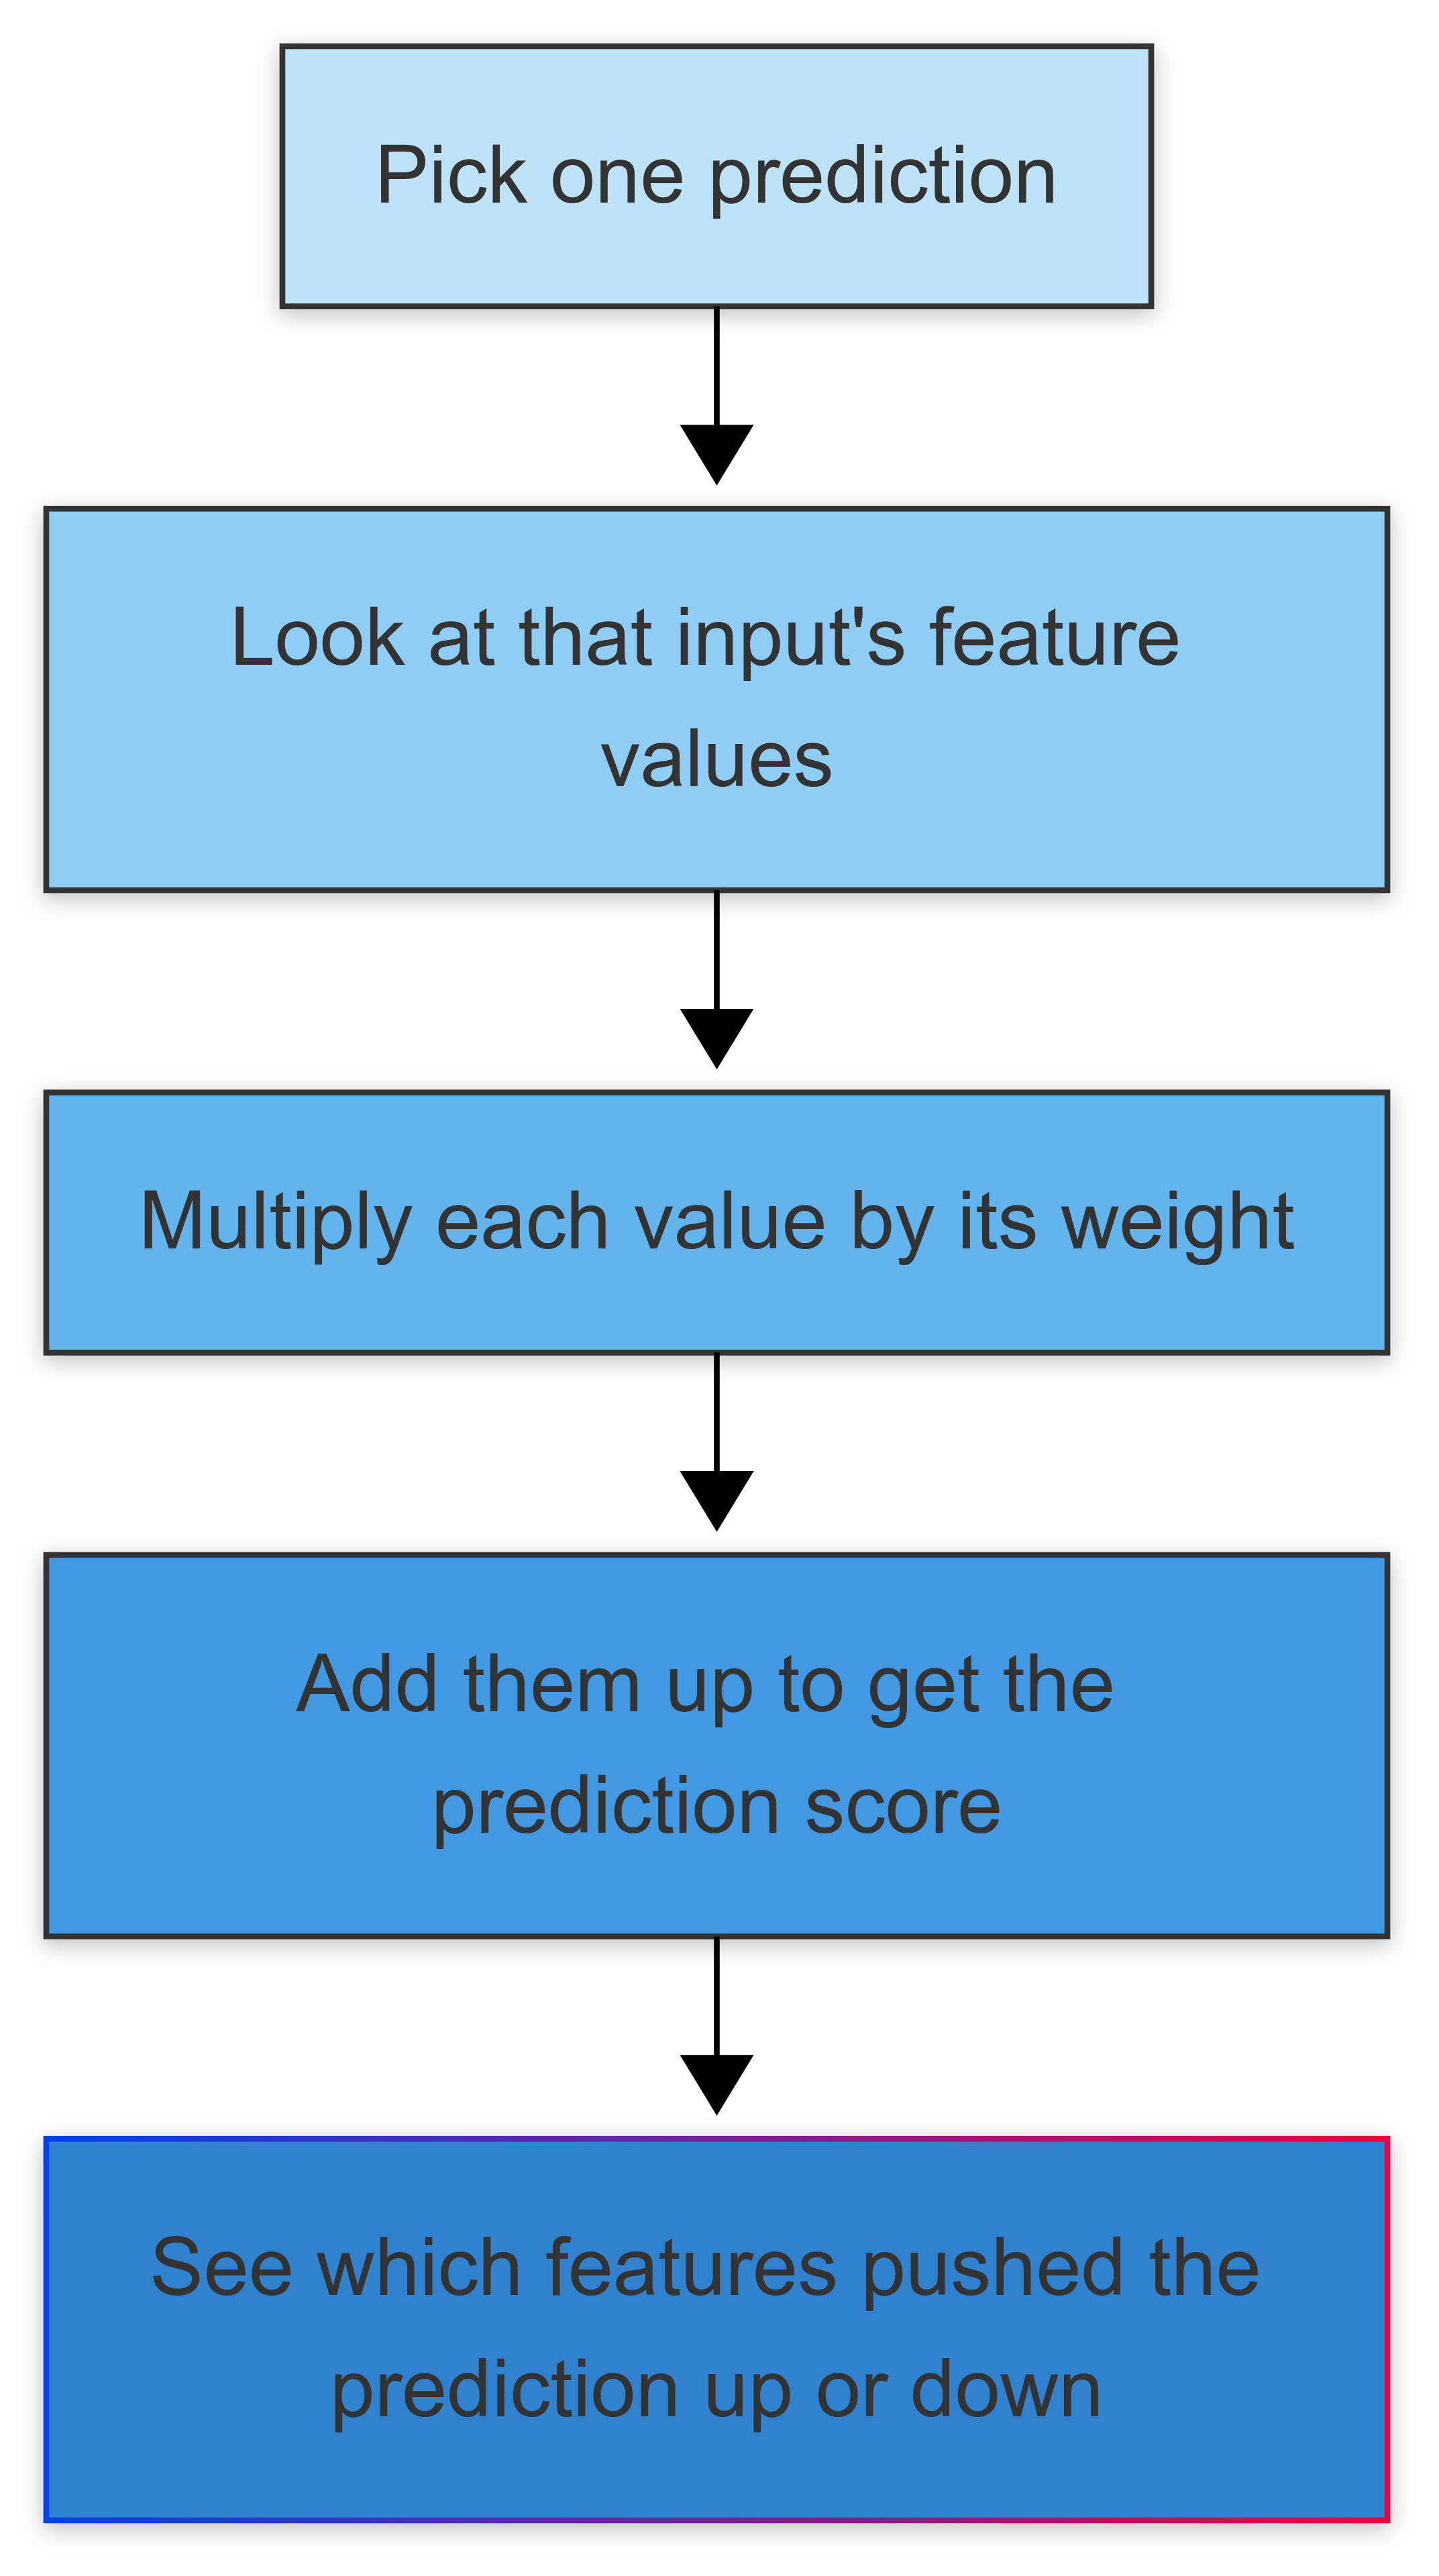
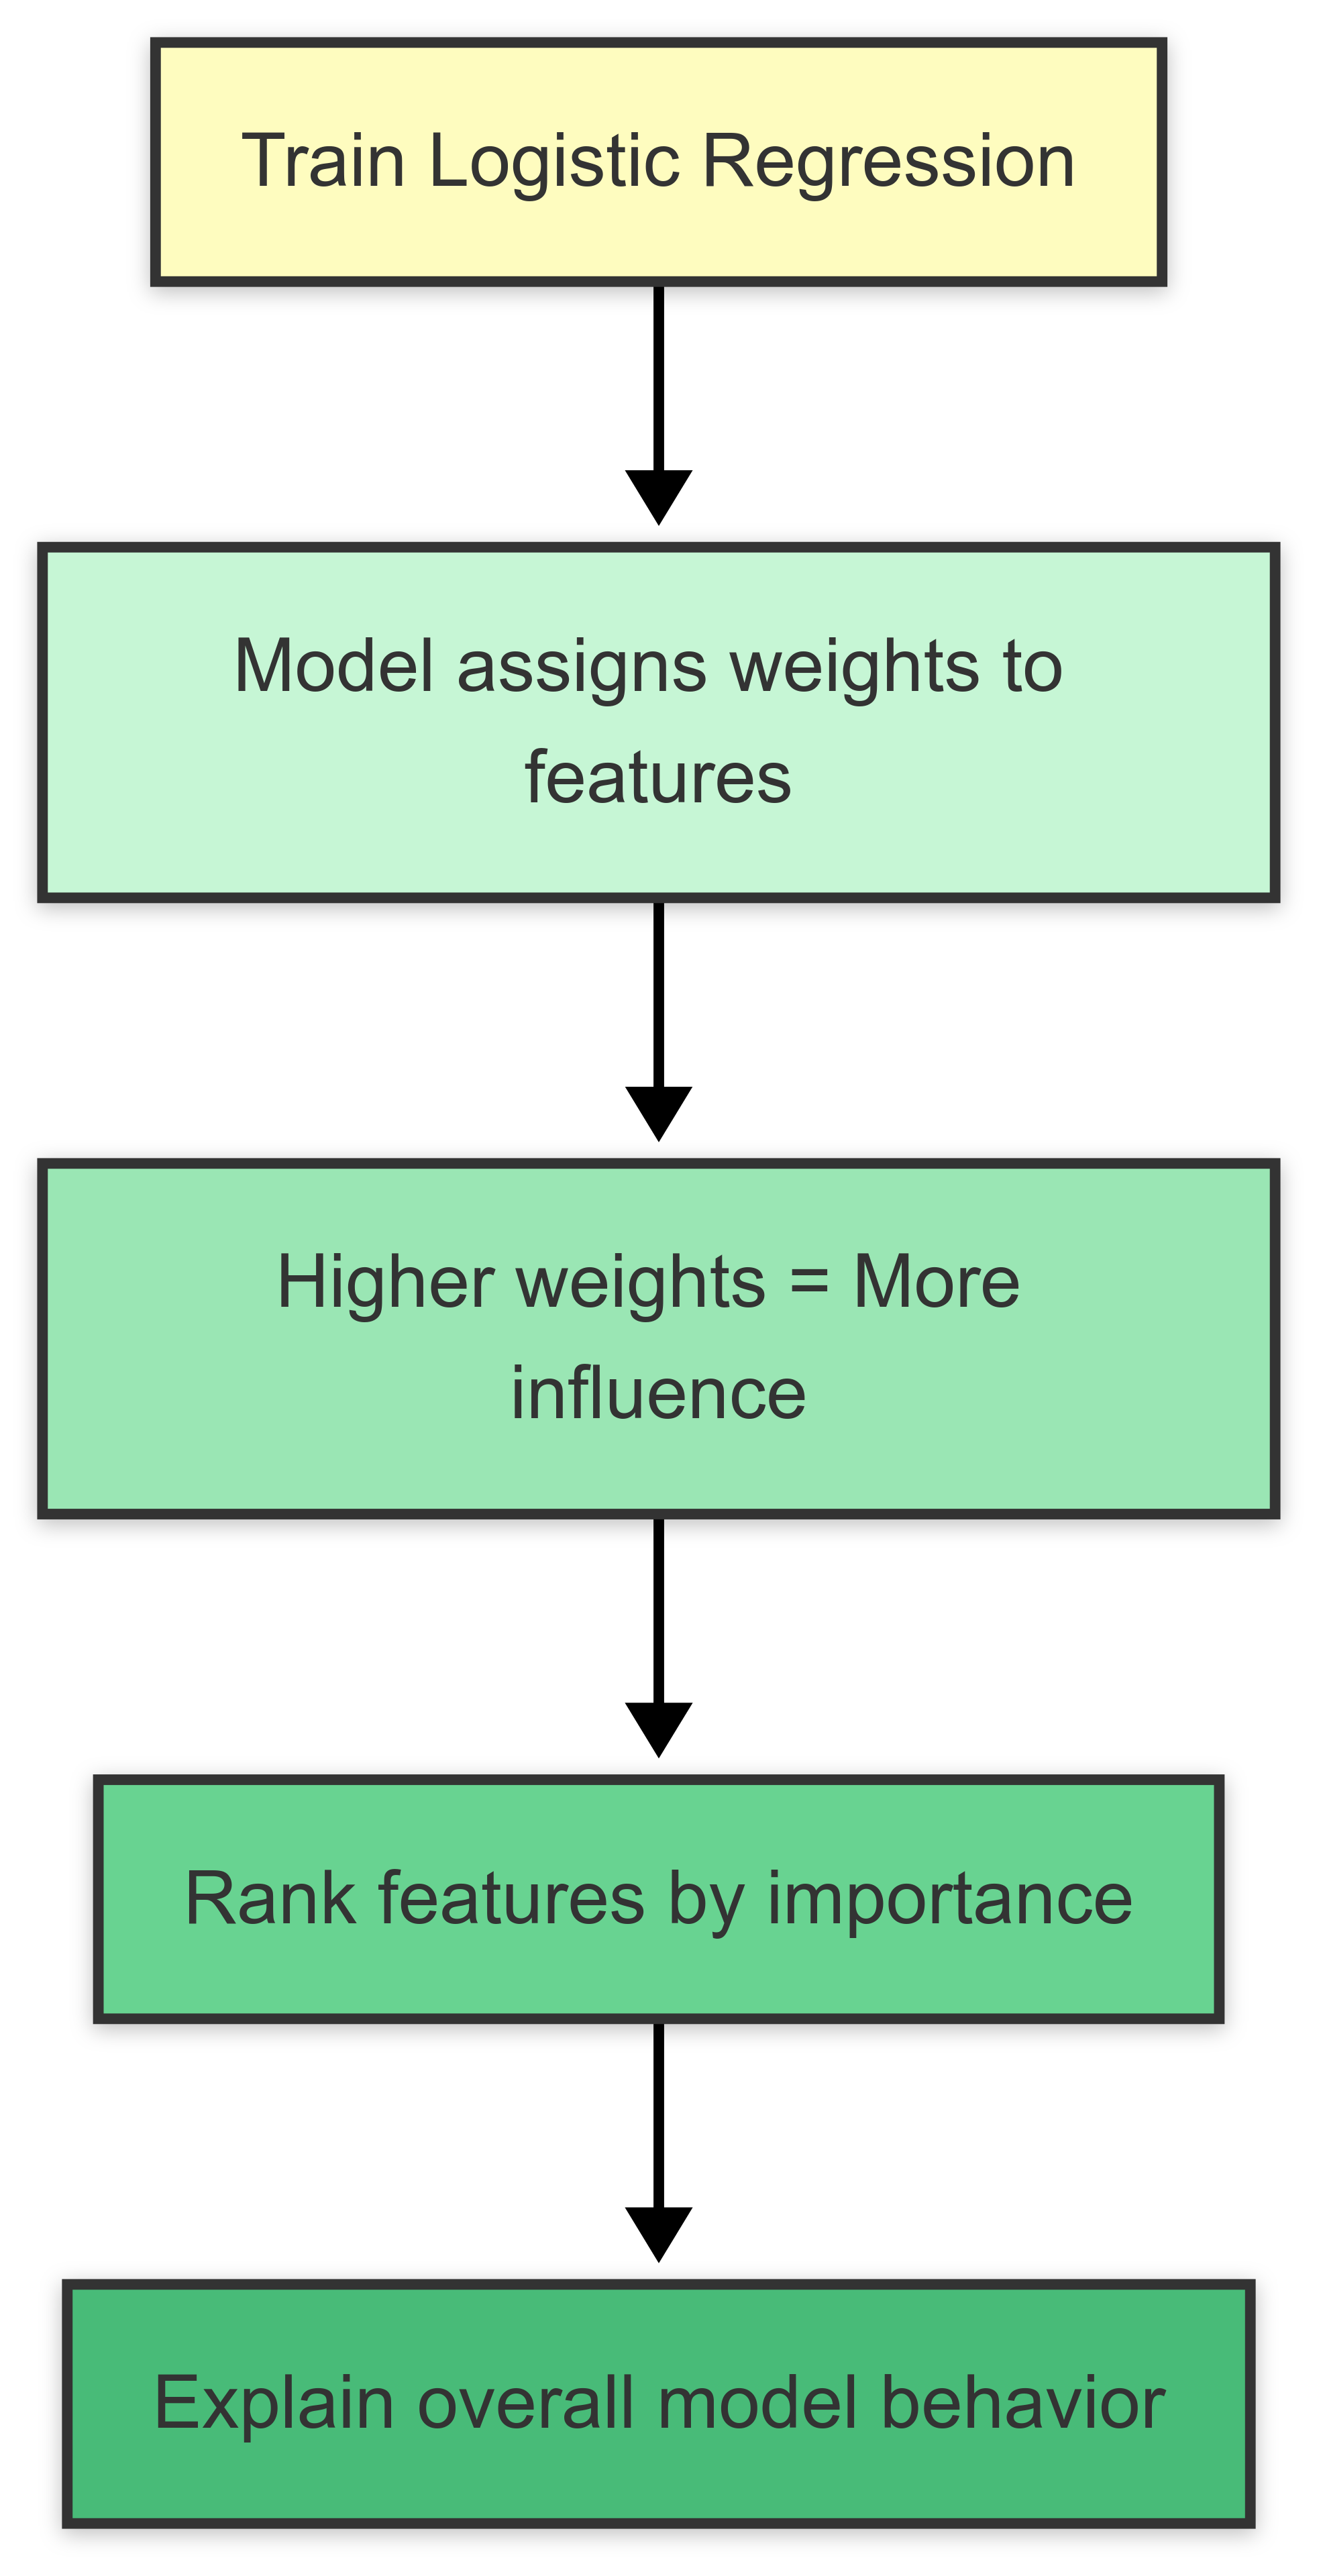

In [ ]:
# Choose a single test instance
idx = 1
instance = X_test.iloc[idx]
instance_scaled = X_test_scaled[idx]
actual_label = y_test.iloc[idx]

# Get prediction probability and class
proba = model.predict_proba([instance_scaled])[0][1]
pred_class = model.predict([instance_scaled])[0]

print(f"📌 Actual Label: {actual_label}")
print(f"🧠 Predicted Class: {pred_class}")
print(f"📈 Probability of Diabetes: {proba:.3f}")

In [ ]:
# Compute individual contributions in the final output
contributions = instance_scaled * model.coef_[0]

# Combine into a DataFrame
local_df = pd.DataFrame({
    "Feature": X.columns,
    "Value": instance.values,
    "Scaled Value": instance_scaled,
    "Coefficient": model.coef_[0],
    "Contribution in the Final Output": contributions
}).sort_values(by="Contribution in the Final Output", key=abs, ascending=False)

# Display top contributing features
local_df

In [ ]:
# Visualize contributions
plt.figure(figsize=(10, 6))
sns.barplot(data=local_df, x="Contribution in the Final Output", y="Feature", palette="coolwarm")
plt.axvline(0, color='gray', linestyle='--')
plt.title(f"Local Explanation for Test Instance #{idx}")
plt.xlabel("Contribution in the Final Output")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 🌳 Explainability with Decision Tree

Decision Trees are inherently interpretable because they make predictions by following a **path of logical rules** (e.g., `Glucose > 130`, `BMI < 30`, etc.).

Let’s train a Decision Tree and visualize the **decision path** for an individual patient.

> Unlike Logistic Regression, Decision Trees don’t use additive contributions. Instead, the explanation is a series of **"if this, then that"** rules leading to the outcome.

### Visualization
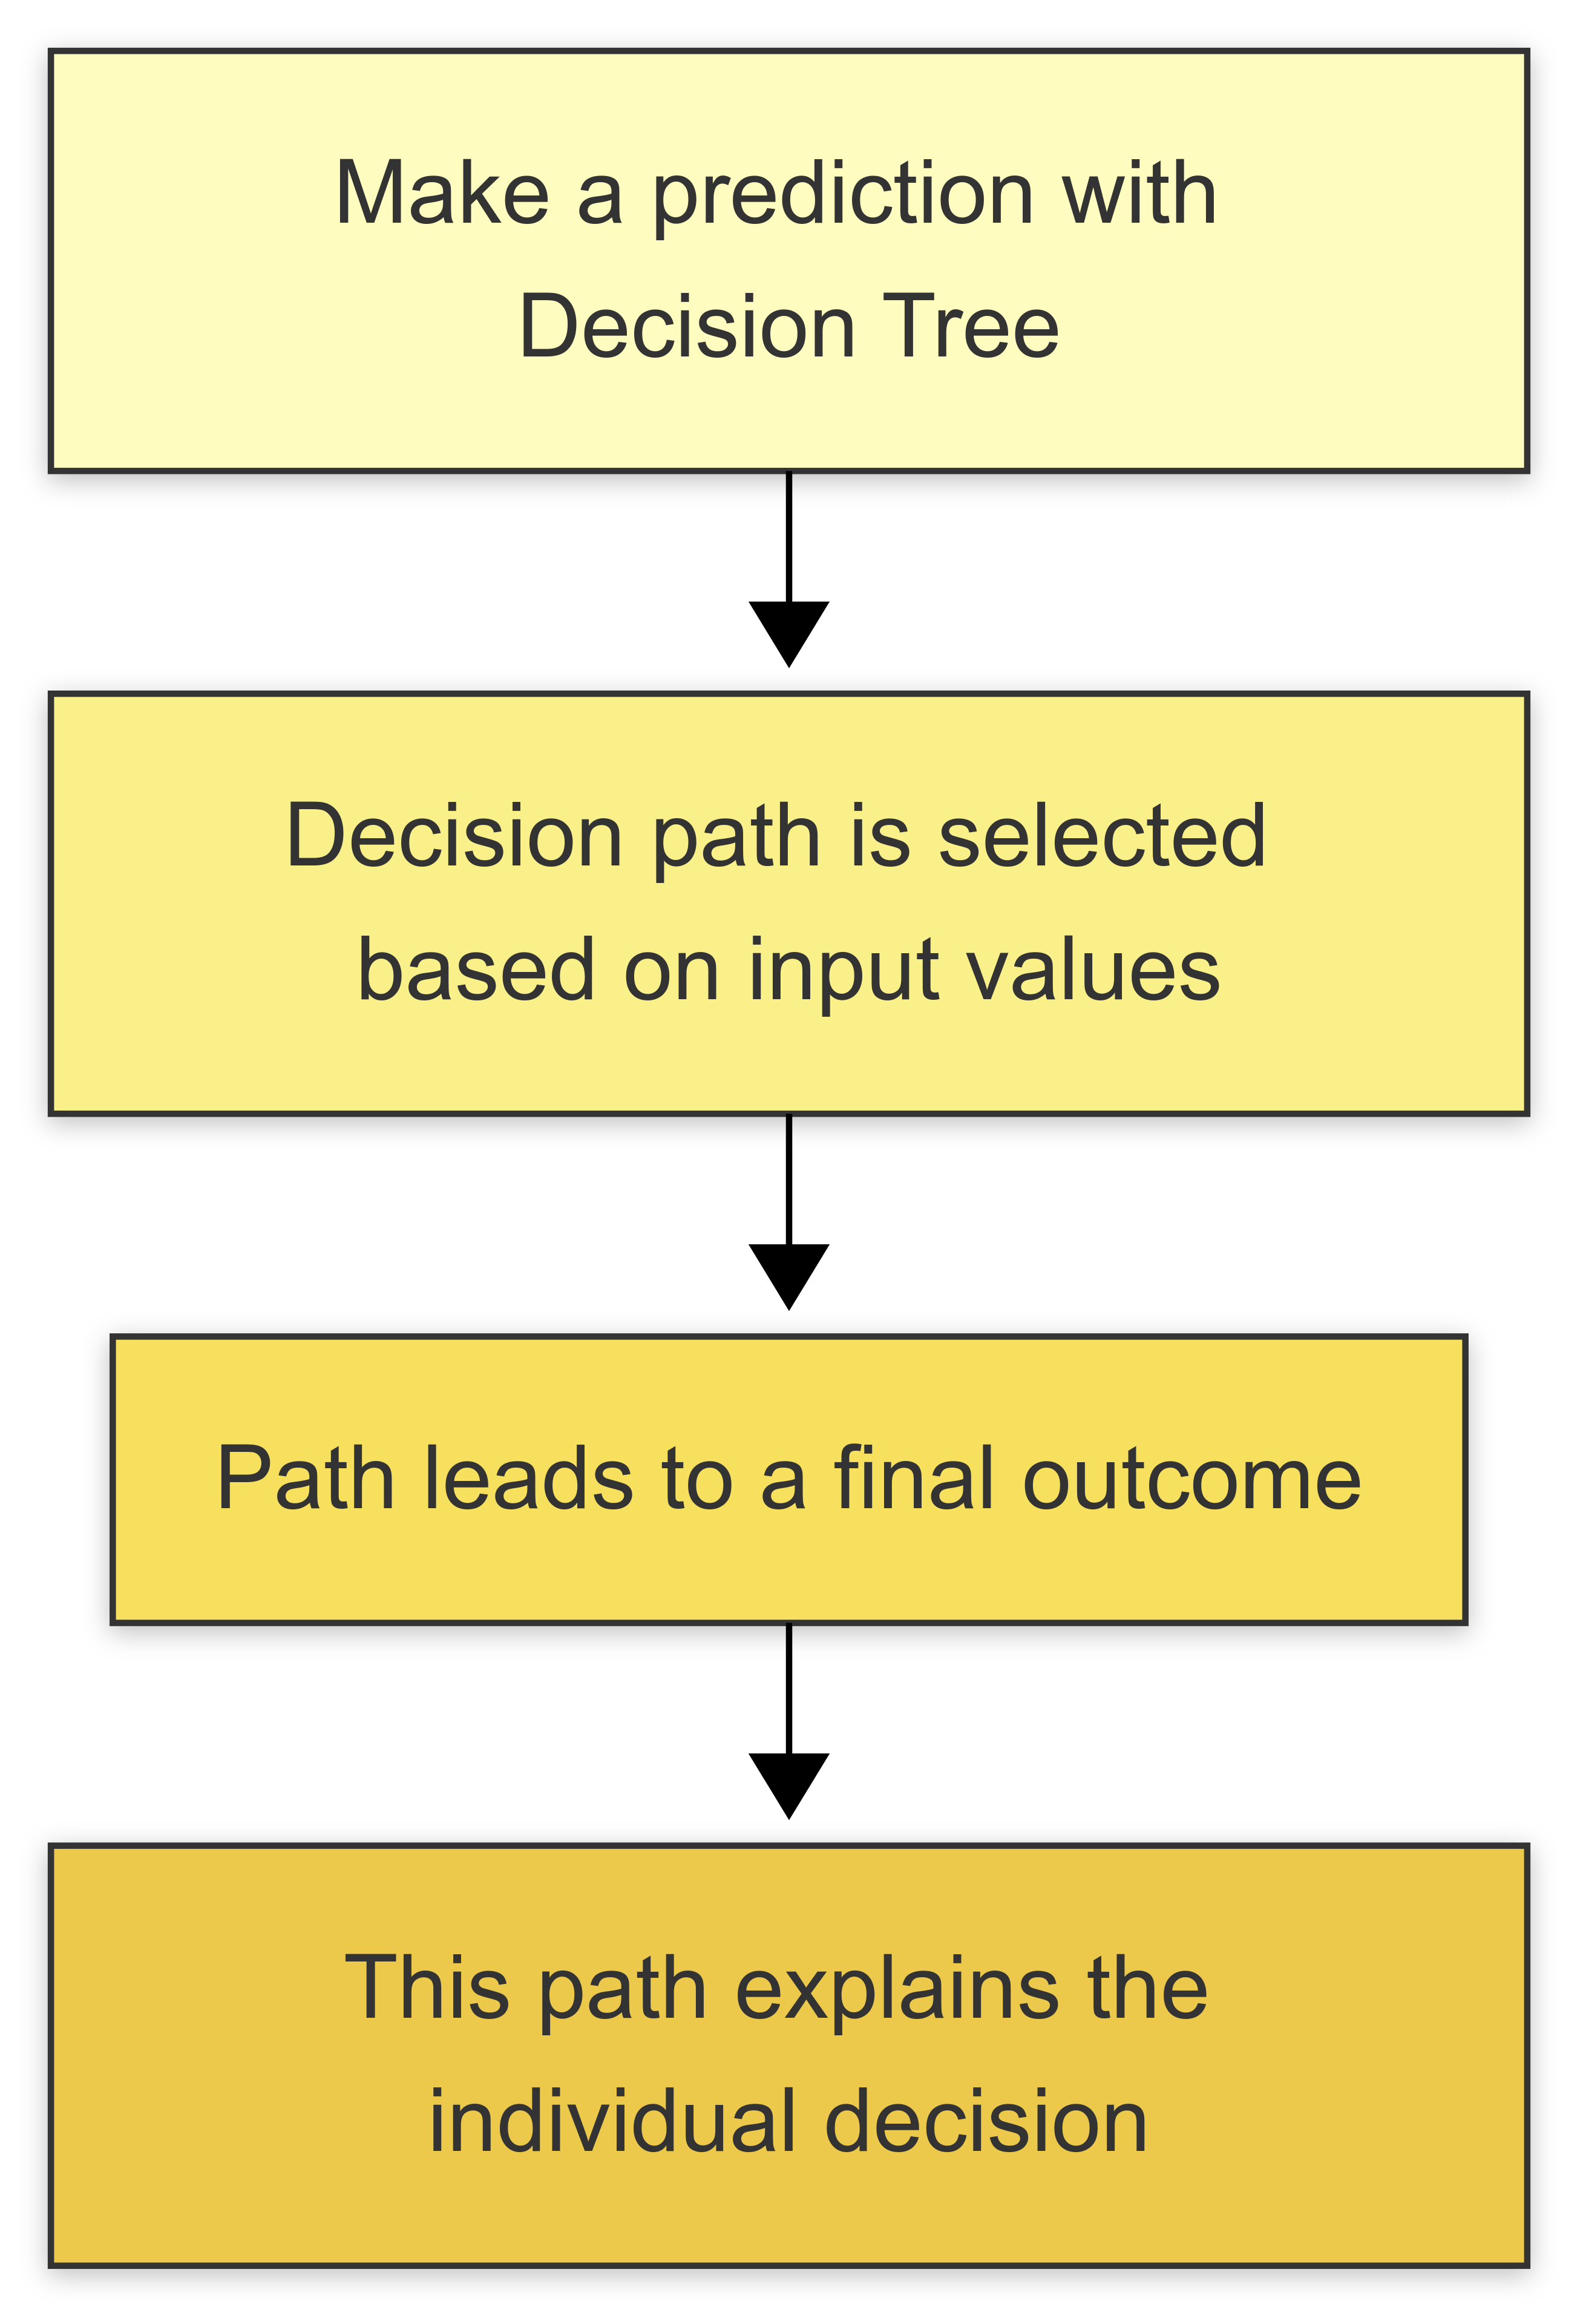


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

# Features and target
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train a Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3,random_state=42)  # keep it small for easy interpretation
tree_model.fit(X_train, y_train)

# Get predictions on unseen test records
y_pred = tree_model.predict(X_test)
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

In [ ]:
# Predict for the same instance
idx = 0
instance = X_test.iloc[idx]
true_label = y_test.iloc[idx]
predicted = tree_model.predict([instance])[0]
proba = tree_model.predict_proba([instance])[0][1]

print(f"📌 Actual Label: {true_label}")
print(f"🧠 Predicted Class: {predicted}")
print(f"📈 Probability of Diabetes: {proba:.3f}")

In [ ]:
# Get the decision path
node_indicator = tree_model.decision_path([instance])
feature_names = X.columns

# Print conditions along the path
leaf_id = tree_model.apply([instance])[0]
feature_index = tree_model.tree_.feature
threshold = tree_model.tree_.threshold

print("🧩 Decision Path:")

for node_id in node_indicator.indices:
    if leaf_id == node_id:
        continue

    f_idx = feature_index[node_id]
    thresh = threshold[node_id]
    f_val = instance[feature_names[f_idx]]

    if f_val <= thresh:
        decision = f"{feature_names[f_idx]} ≤ {thresh:.2f}"
    else:
        decision = f"{feature_names[f_idx]} > {thresh:.2f}"

    print(f"↳ {decision} (actual value: {f_val})")


In [ ]:
!pip install supertree --quiet

In [ ]:
from supertree import SuperTree
super_tree = SuperTree(tree_model, X, y, list(X.columns), ["No Diabetes", "Diabetes"])

# show tree in your notebook
super_tree.show_tree()

## 🔍 Interpretable Models vs Post-hoc Explainability Tools

In the context of explainable AI (XAI), it's important to distinguish between **inherently interpretable models** and **post-hoc explainability tools**.

---

### ✅ Interpretable Models

These models are **transparent by design** — their internal mechanics can be easily understood by humans. Their decision-making process is **intrinsically explainable**.

**Examples:**
- Logistic Regression
- Decision Trees

**Benefits:**
- Simpler to audit and validate
- Easy to communicate to domain experts (e.g., clinicians)
- No need for additional tools to understand behavior

---

### ❓ Why Not Always Use Interpretable Models?

While interpretable models are ideal for transparency, they often come with limitations:
- May **lack predictive power** on complex datasets
- Struggle to capture **non-linear relationships**
- Performance trade-offs can be significant in real-world healthcare scenarios

---

### ⚙️ Post-hoc Explainability Tools

Post-hoc methods are applied **after training a model** to help explain its predictions. These are especially useful when using **complex "black-box" models** like:
- Random Forests
- Gradient Boosted Trees
- Deep Neural Networks

**Examples of Post-hoc Tools:**
- SHAP (SHapley Additive exPlanations)
- LIME (Local Interpretable Model-agnostic Explanations)
- CFE (Counterfactual Explanations)

### Visualization

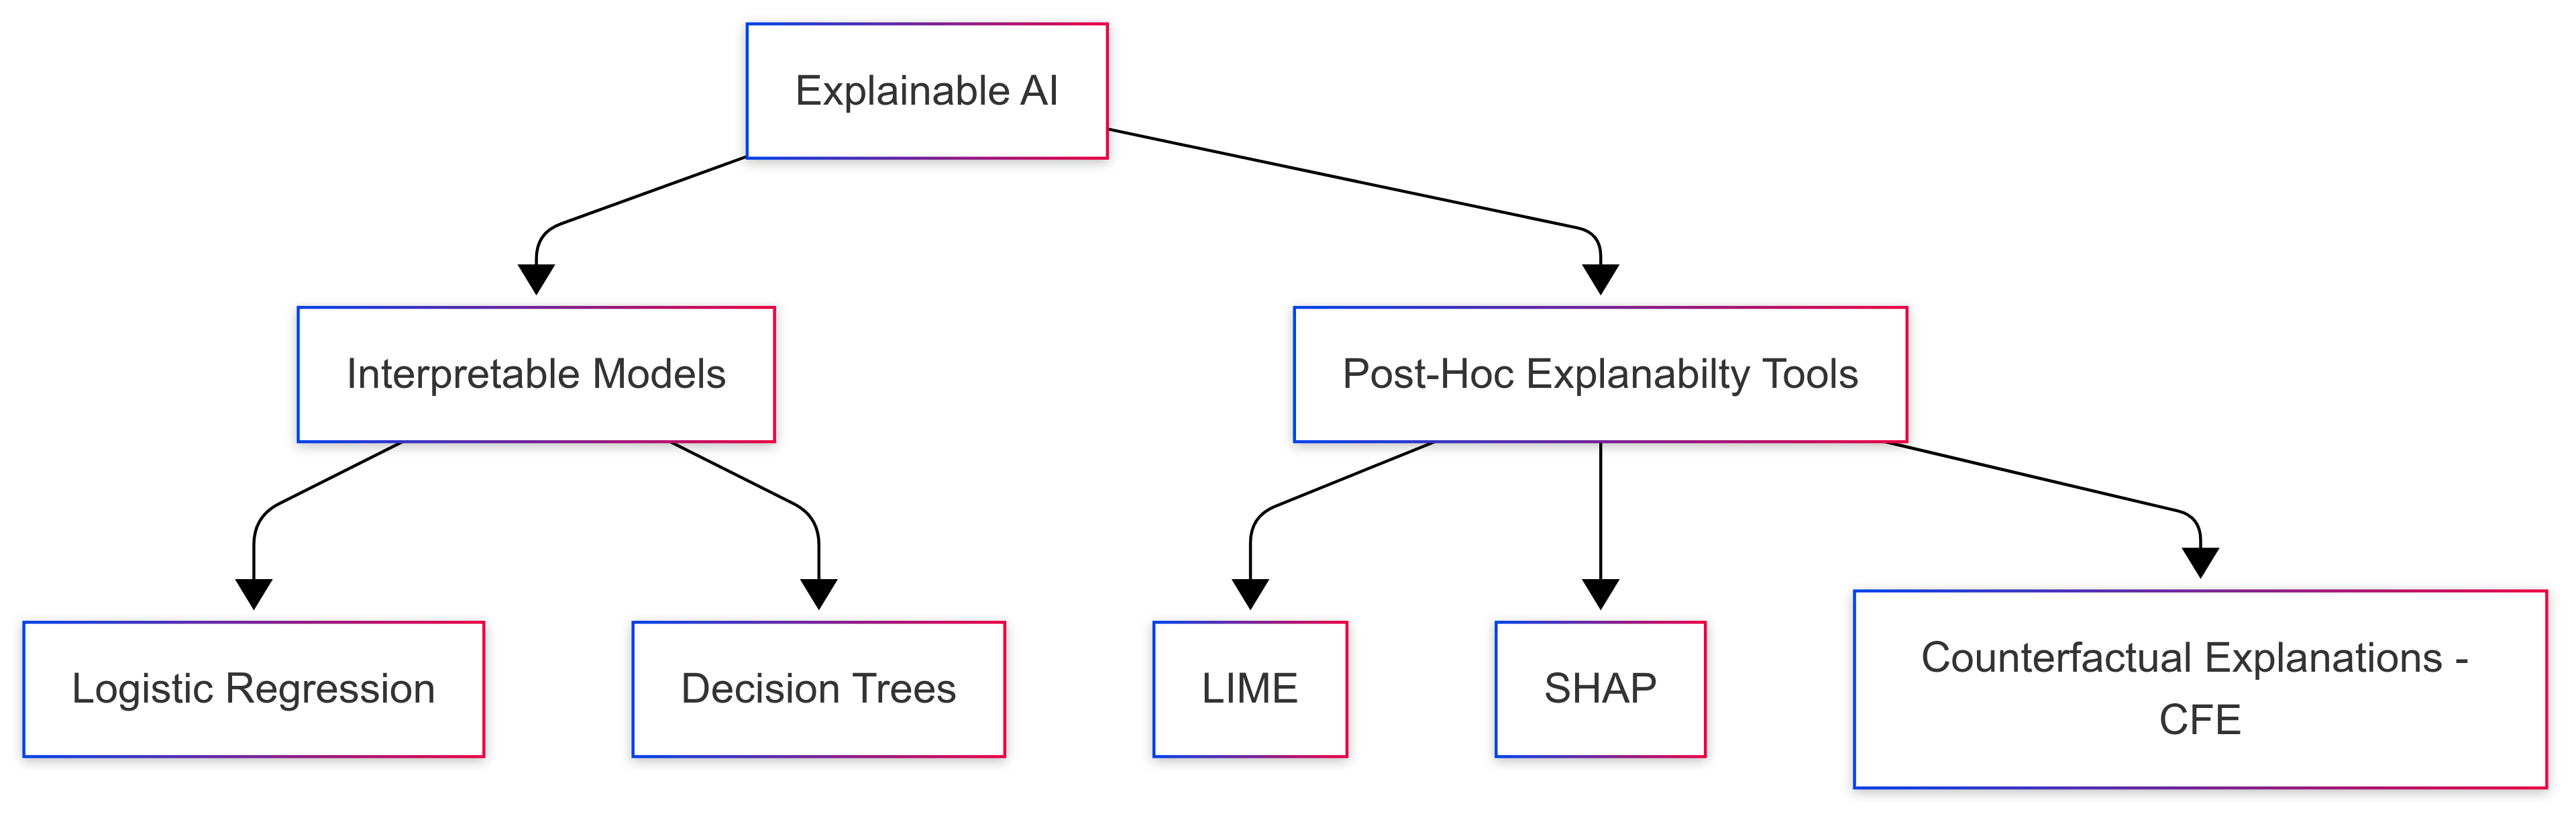

### 🧠 Intuition Behind LIME (Local Interpretable Model-Agnostic Explanations)

Imagine asking a complex medical expert why they made a certain diagnosis. They may have considered dozens of factors and years of experience. It's not easy to get a clear, simple answer.

Now imagine asking:  
👉 _"What were the **top 3 things** that made you think this patient has diabetes?"_

This is what **LIME** tries to do — but with machine learning models.

---

#### 🔍 How It Works (Intuition Only):

Even though a model like Random Forest or XGBoost is too complex to understand all at once, we **only care about one prediction** at a time (like a single patient's result).

So, LIME says:
> "Let's zoom in around this one prediction.  
> I'll create some **slightly modified versions** of the input and see how the model behaves."

By watching how the model's output changes with small tweaks to the input, LIME figures out:
- Which features (like glucose level, BMI, age) are most influential for **this particular prediction**.
- Whether each feature pushed the model toward predicting "diabetes" or "no diabetes".

### Visualization
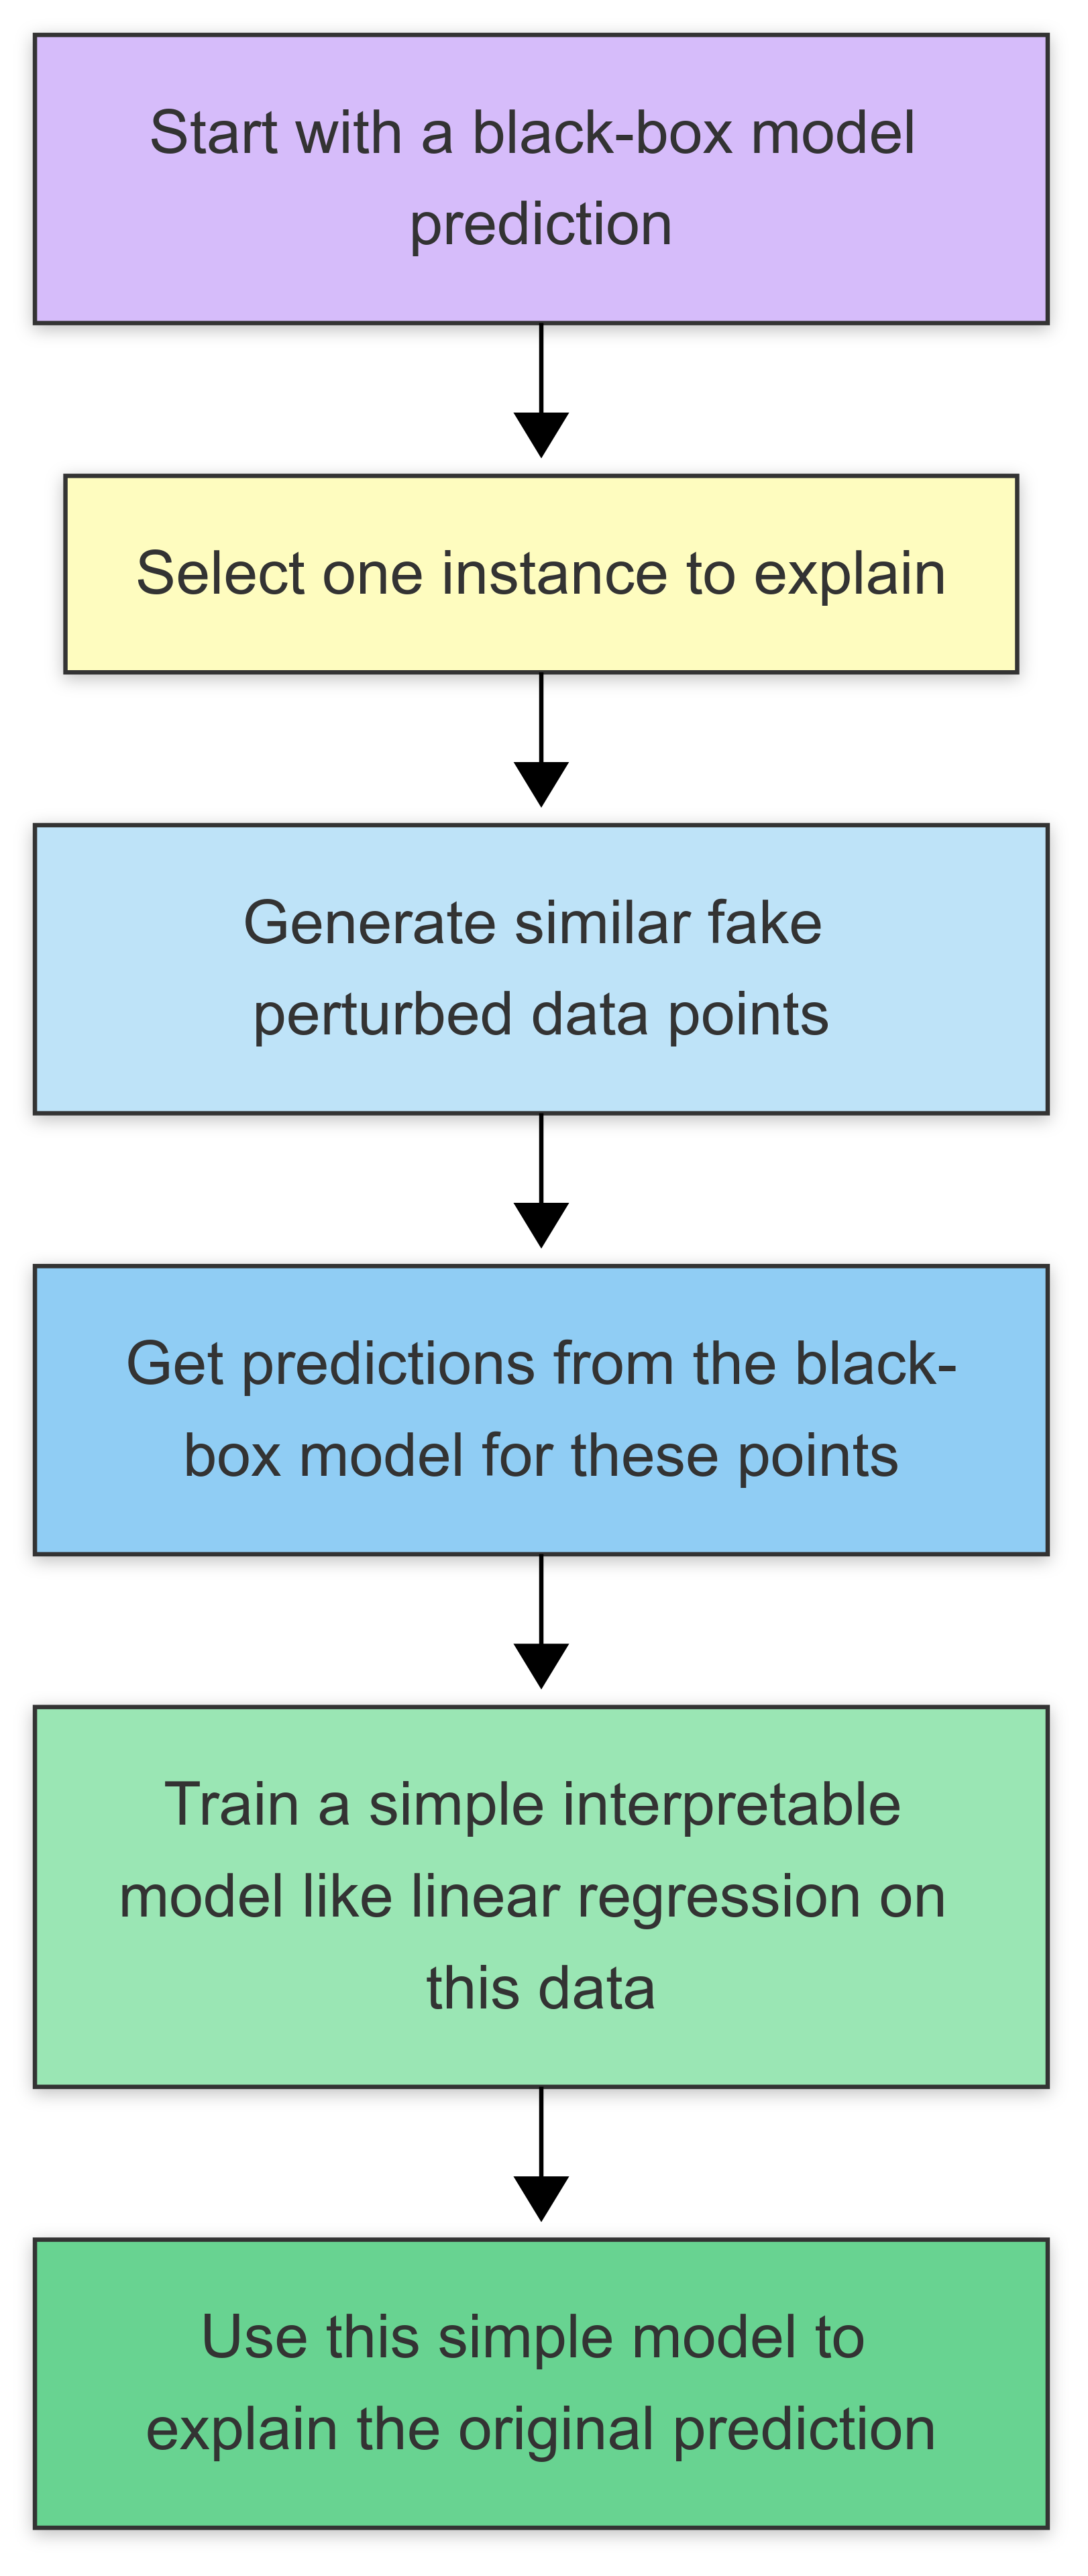



In [ ]:
!pip install lime --quiet

In [ ]:
# Import required libraries
import xgboost as xgb
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Features and target
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# 4. Set up the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

In [ ]:
# Choose a test instance to explain
i = 0  
sample = X_test.iloc[i].values
true_label = y_test.iloc[i]
print("True Label:", true_label)
print("Predicted Label:", xgb_model.predict([sample])[0])

# 7. Generate explanation
exp = explainer.explain_instance(sample, xgb_model.predict_proba, num_features=8)

# Get explanation as a list of (feature, weight) tuples
weights = exp.as_list()
features, contributions = zip(*weights)

# Plot
plt.figure(figsize=(8, 4))
colors = ['red' if w > 0 else 'green' for w in contributions]
plt.barh(features, contributions, color=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("Contribution to prediction")
plt.title("LIME Explanation (Static View)")
plt.gca().invert_yaxis()  # Highest contribution on top
plt.tight_layout()
plt.show()

## 🧠 Intuition Behind SHAP (SHapley Additive exPlanations)

Imagine you want to understand why a **doctor** diagnosed a patient with **diabetes**. The doctor considered multiple factors like age, BMI, blood sugar level, etc.

You could ask the doctor:
> _"What role did each factor play in the final diagnosis?"_

**SHAP** answers this question, but in a more precise and mathematical way. It takes each feature (age, BMI, blood sugar, etc.) and tells you **how much that feature contributed** to the final decision — in terms of **shifting** the prediction.

---

#### 🔍 How It Works (Intuition Only):

Think of **SHAP** as a **teamwork approach**:
- Imagine each feature (like blood sugar or BMI) as a team member.
- The **SHAP value** of a feature is like saying, _"How much did this feature **help** the team make the final prediction?"_

It uses **game theory** to measure each feature’s fair share of the prediction outcome, ensuring that:
- All features are treated fairly.
- The total contribution of all features adds up to the final prediction.

**Example:** If we predict that a patient has diabetes:
- **Blood sugar level** might contribute strongly (positive SHAP value) towards the diagnosis of diabetes.
- **Age** might slightly **lower** the chance of diabetes (negative SHAP value).
- **BMI** might have little effect, leading to a small SHAP value.

### Visualization
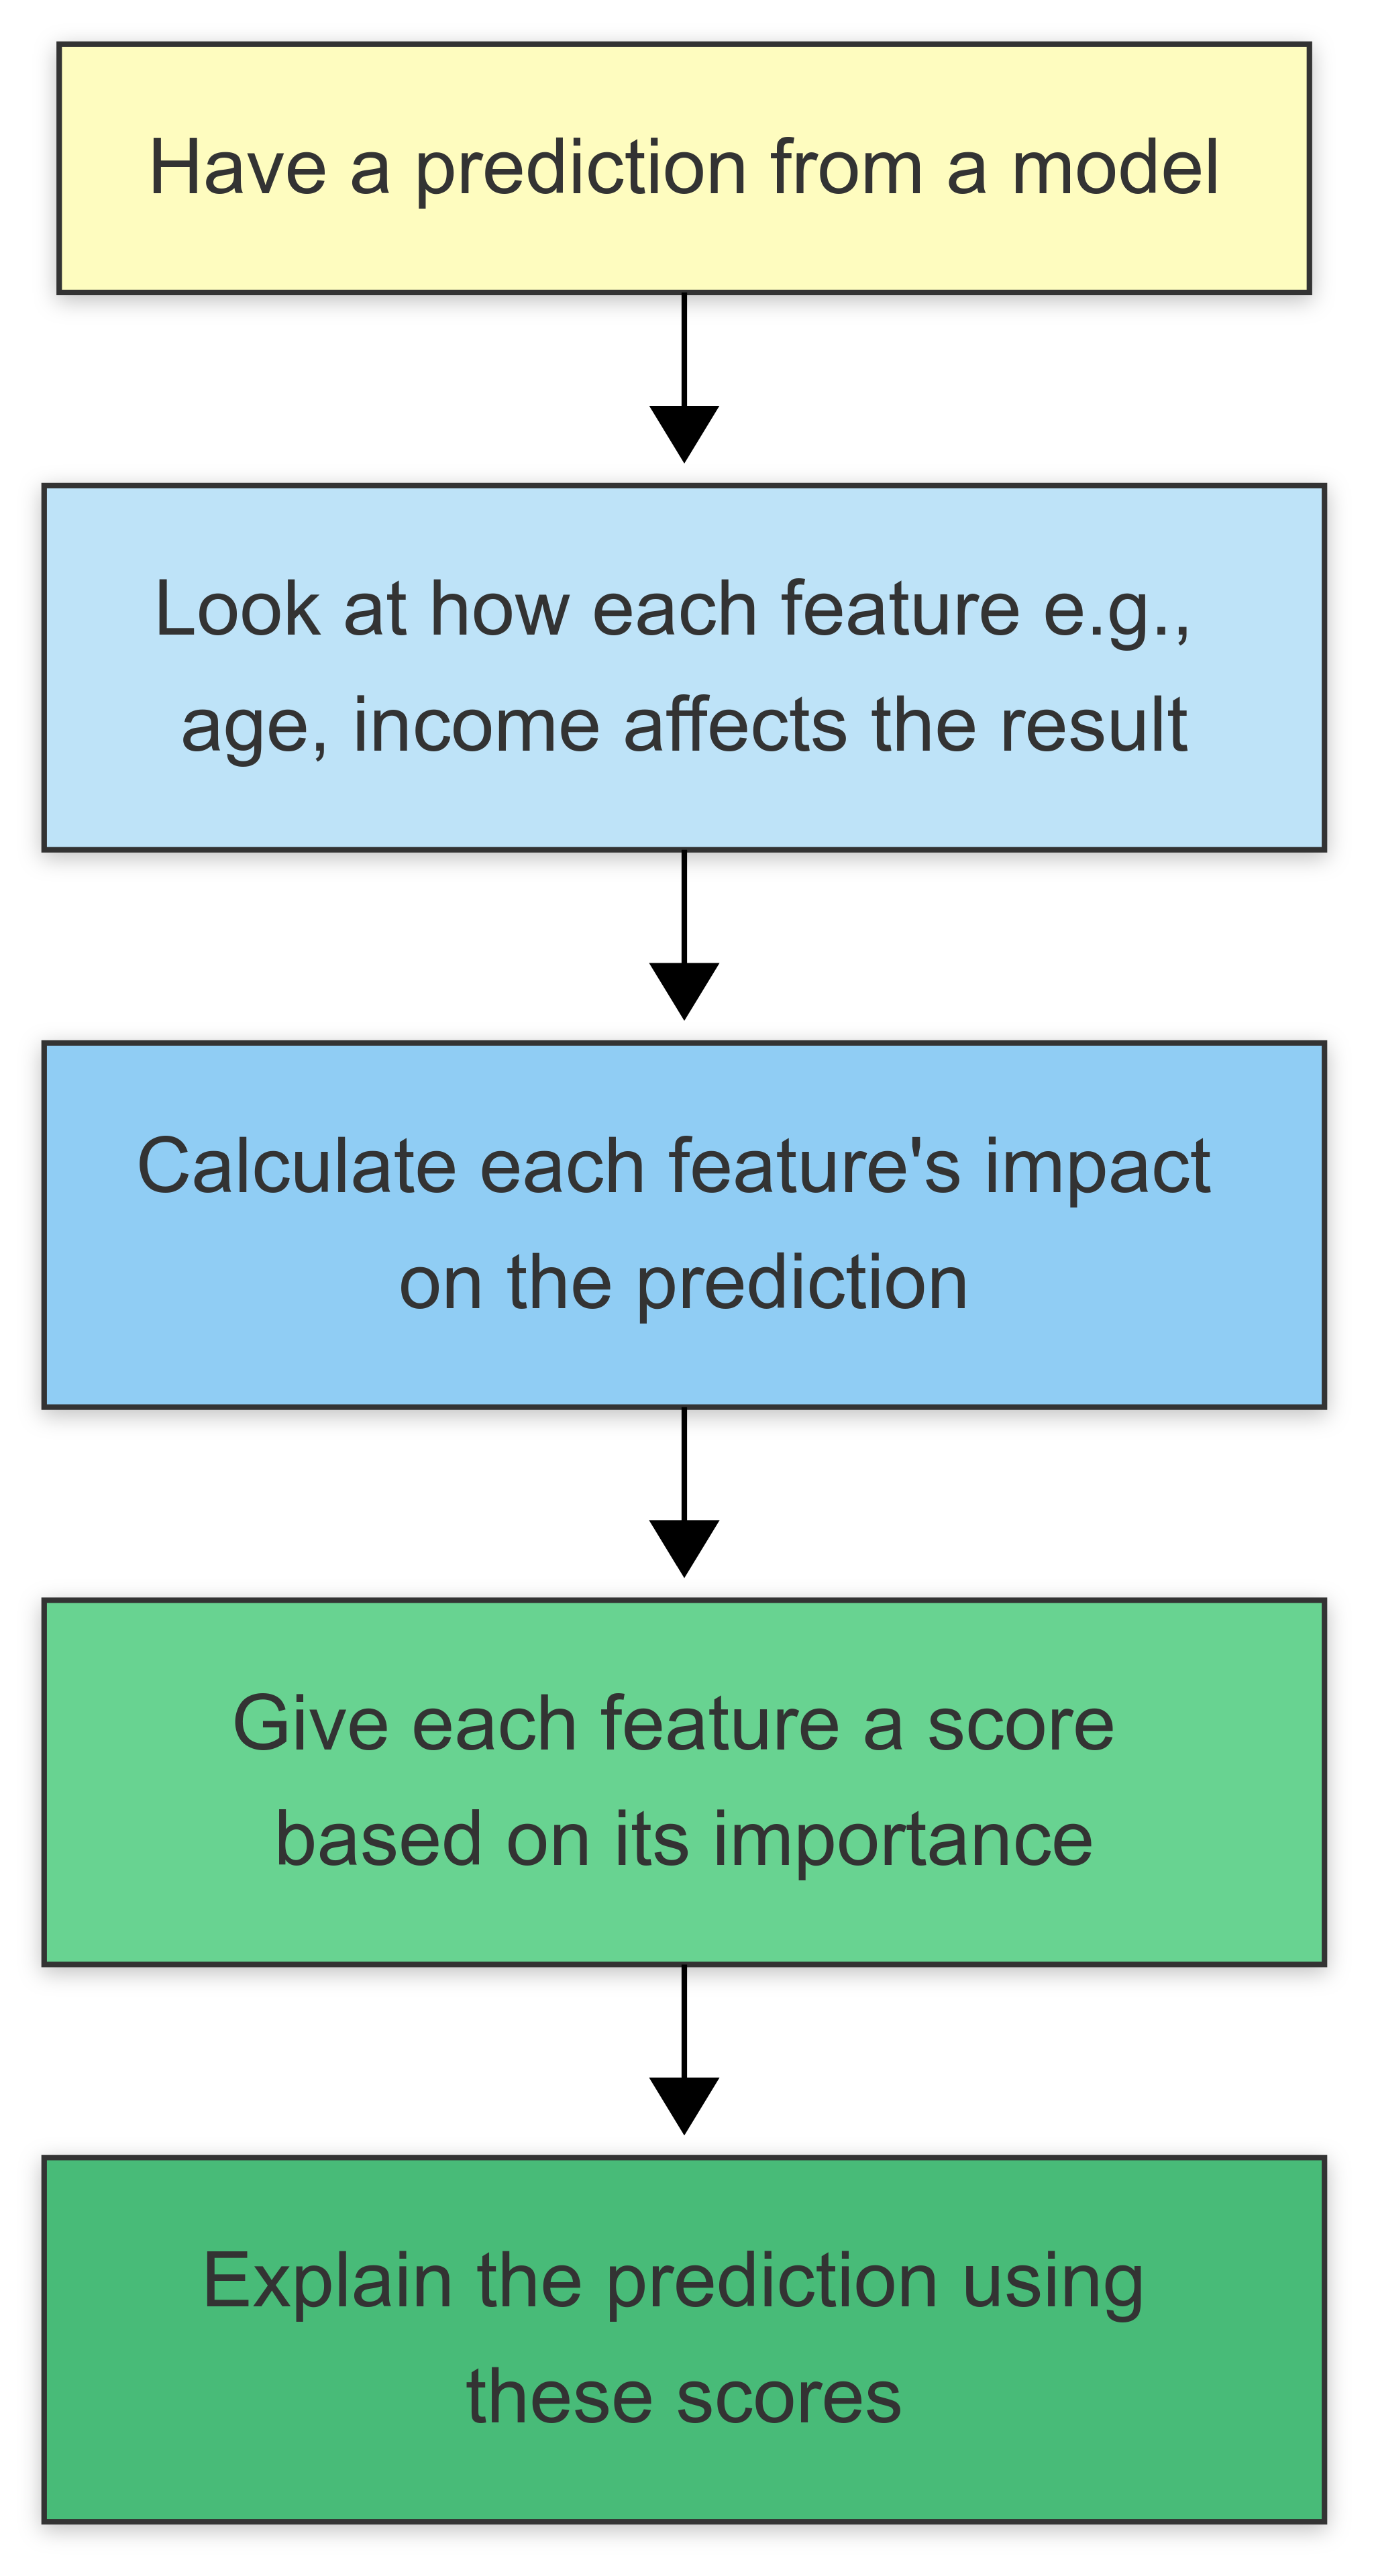
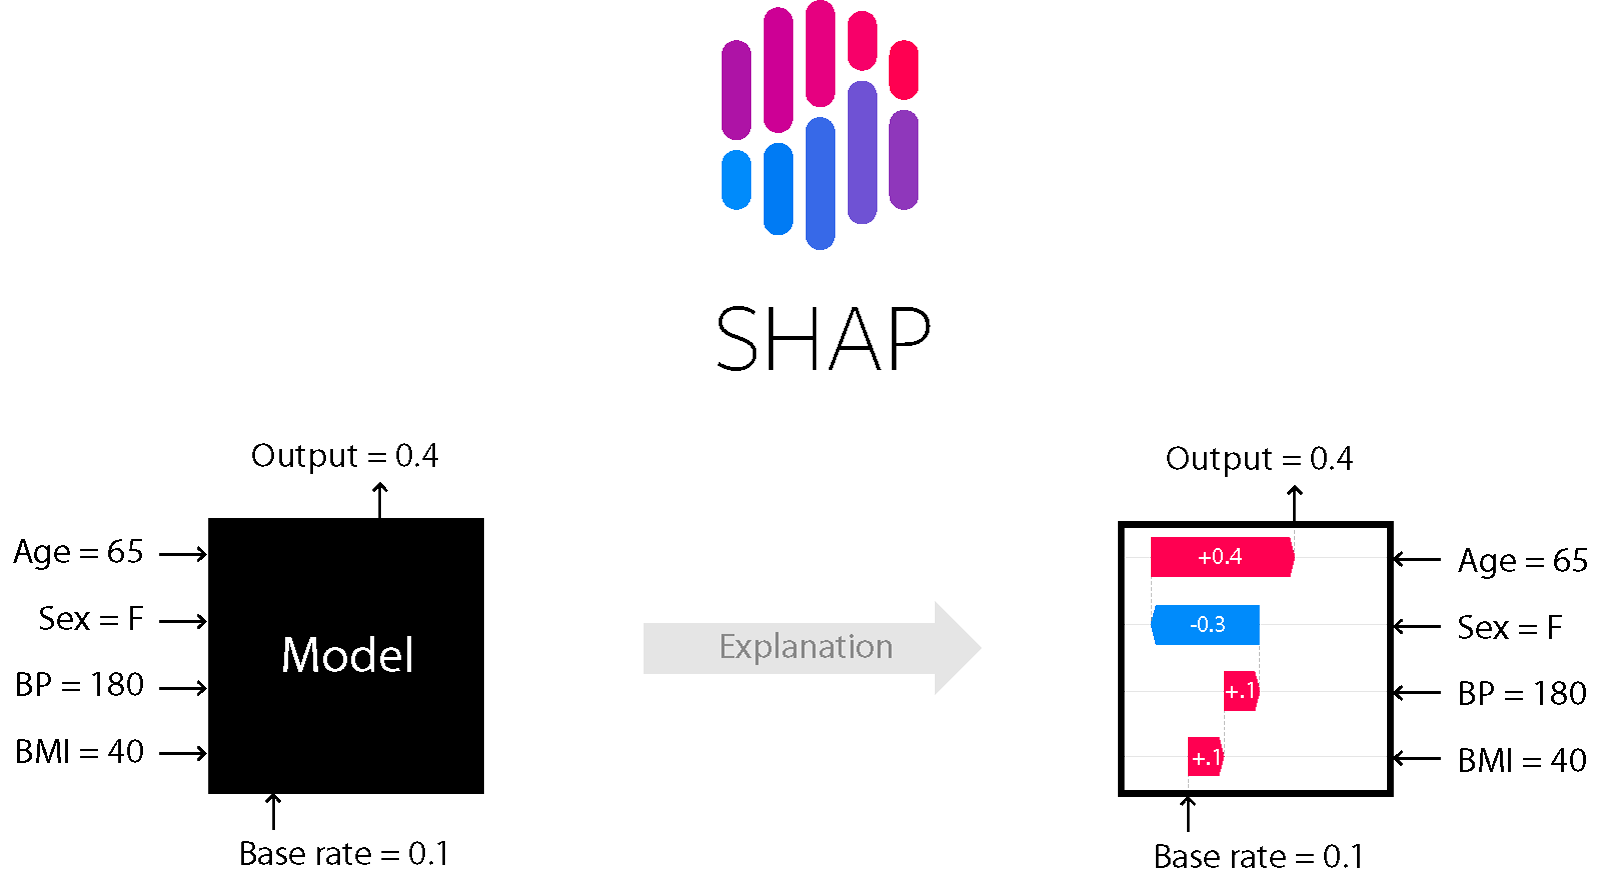
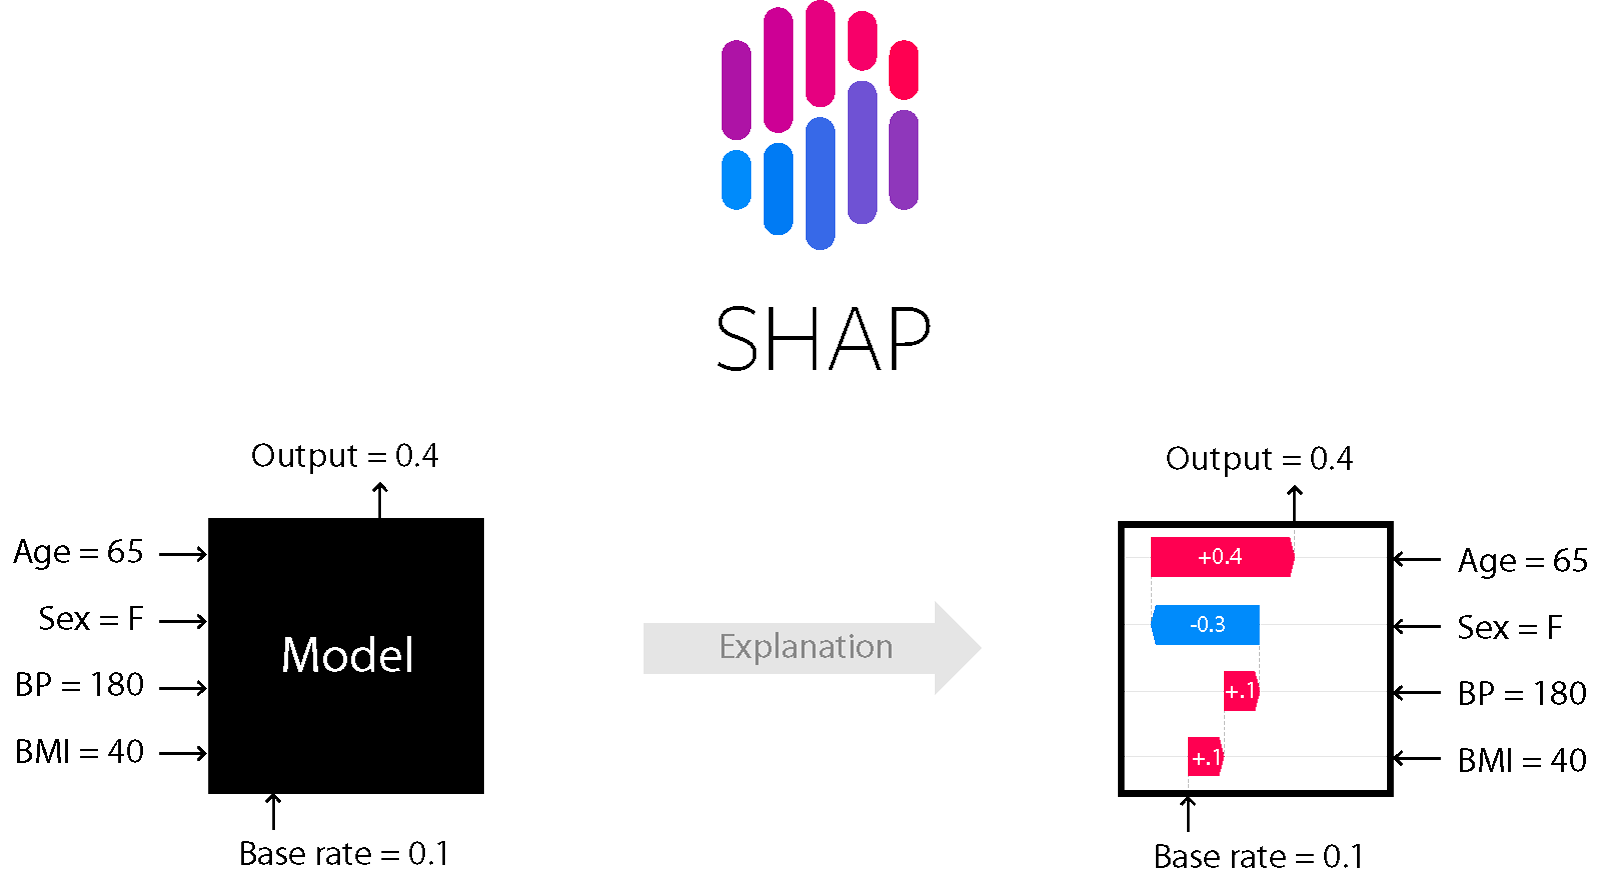
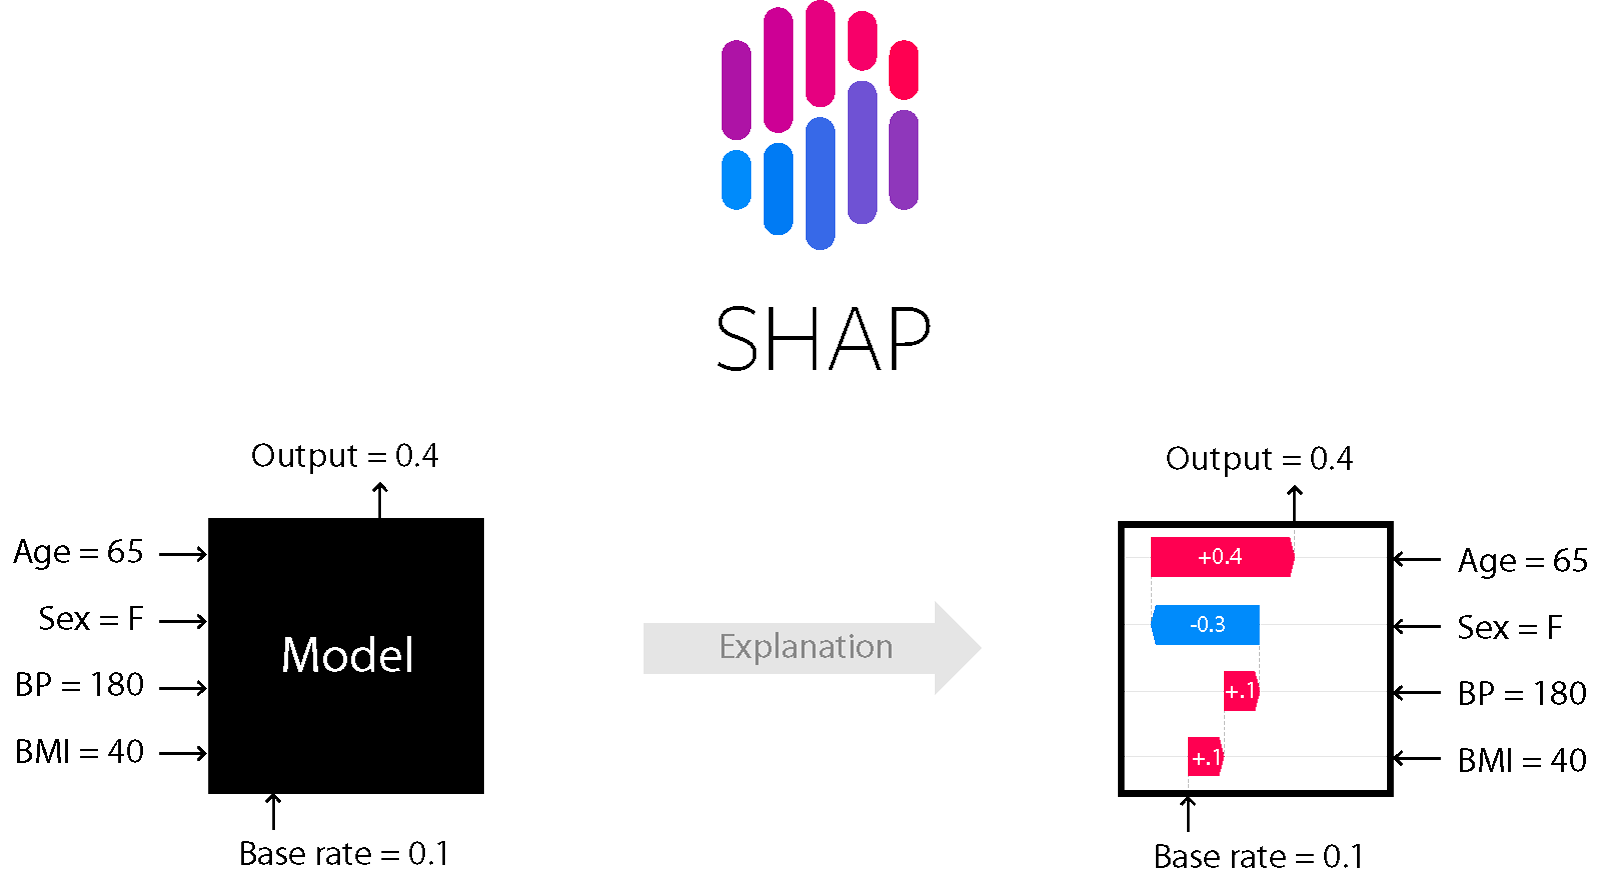
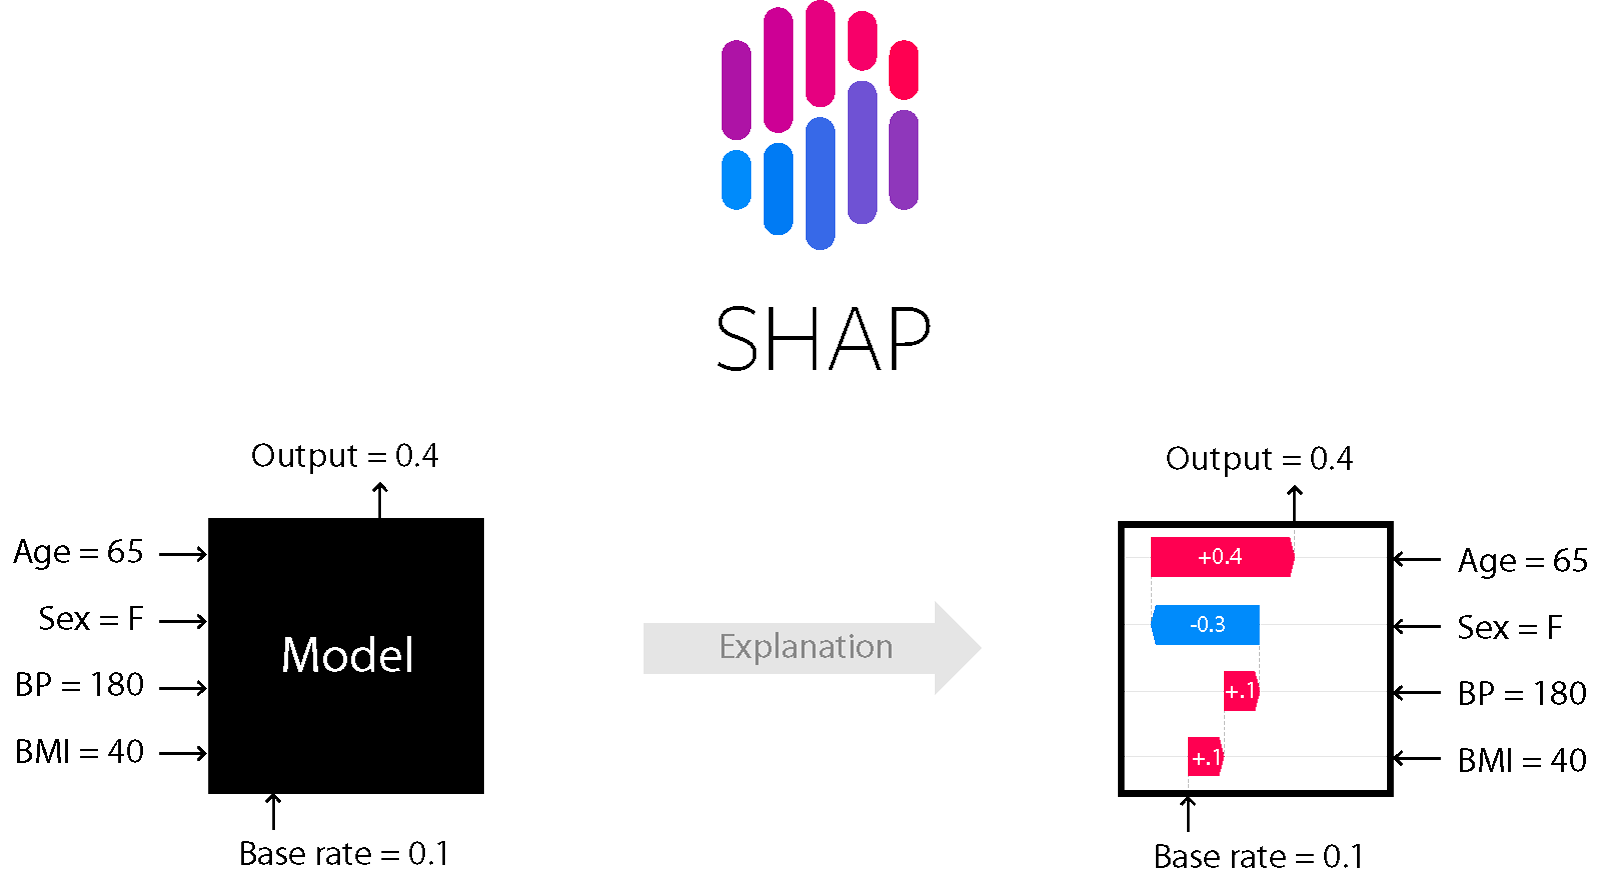

In [ ]:
!pip install shap --quiet

In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

In [ ]:
# Choose a test instance to explain
i = 4
instance = X_test.iloc[i:i+1]
print(instance)

# Compute SHAP values for the instance
shap_values = explainer.shap_values(instance)

# Visualize the explanation for the first class (0: No Diabetes)
shap.initjs()  # Initializes JS for SHAP plots
shap.force_plot(explainer.expected_value[0], shap_values[0], list(X.columns))

## 🧠 Intuition Behind Counterfactual Explanations (CFE)

Imagine a doctor tells a patient, “You are at high risk of developing diabetes.”  
Naturally, the next question is: **"What can I change to reduce that risk?"**

This is where **Counterfactual Explanations (CFEs)** come in.

---

### 🚦 What is a Counterfactual?

A counterfactual answers the question:

> _"What is the closest change to this input that would lead to a different (usually better) prediction?"_

For example:
- “If your glucose level were 110 instead of 130, the model would not have flagged diabetes risk.”
- “If your BMI were just slightly lower, you would have been predicted as low-risk.”

---

### 🔄 How It Works (Intuitively)

1. Take the input data (e.g., patient metrics).
2. Search for a new data point that:
   - Is as **similar** as possible to the original.
   - But leads to a **different prediction** (e.g., no diabetes).
3. Present the **differences** as the explanation.

### Visualization
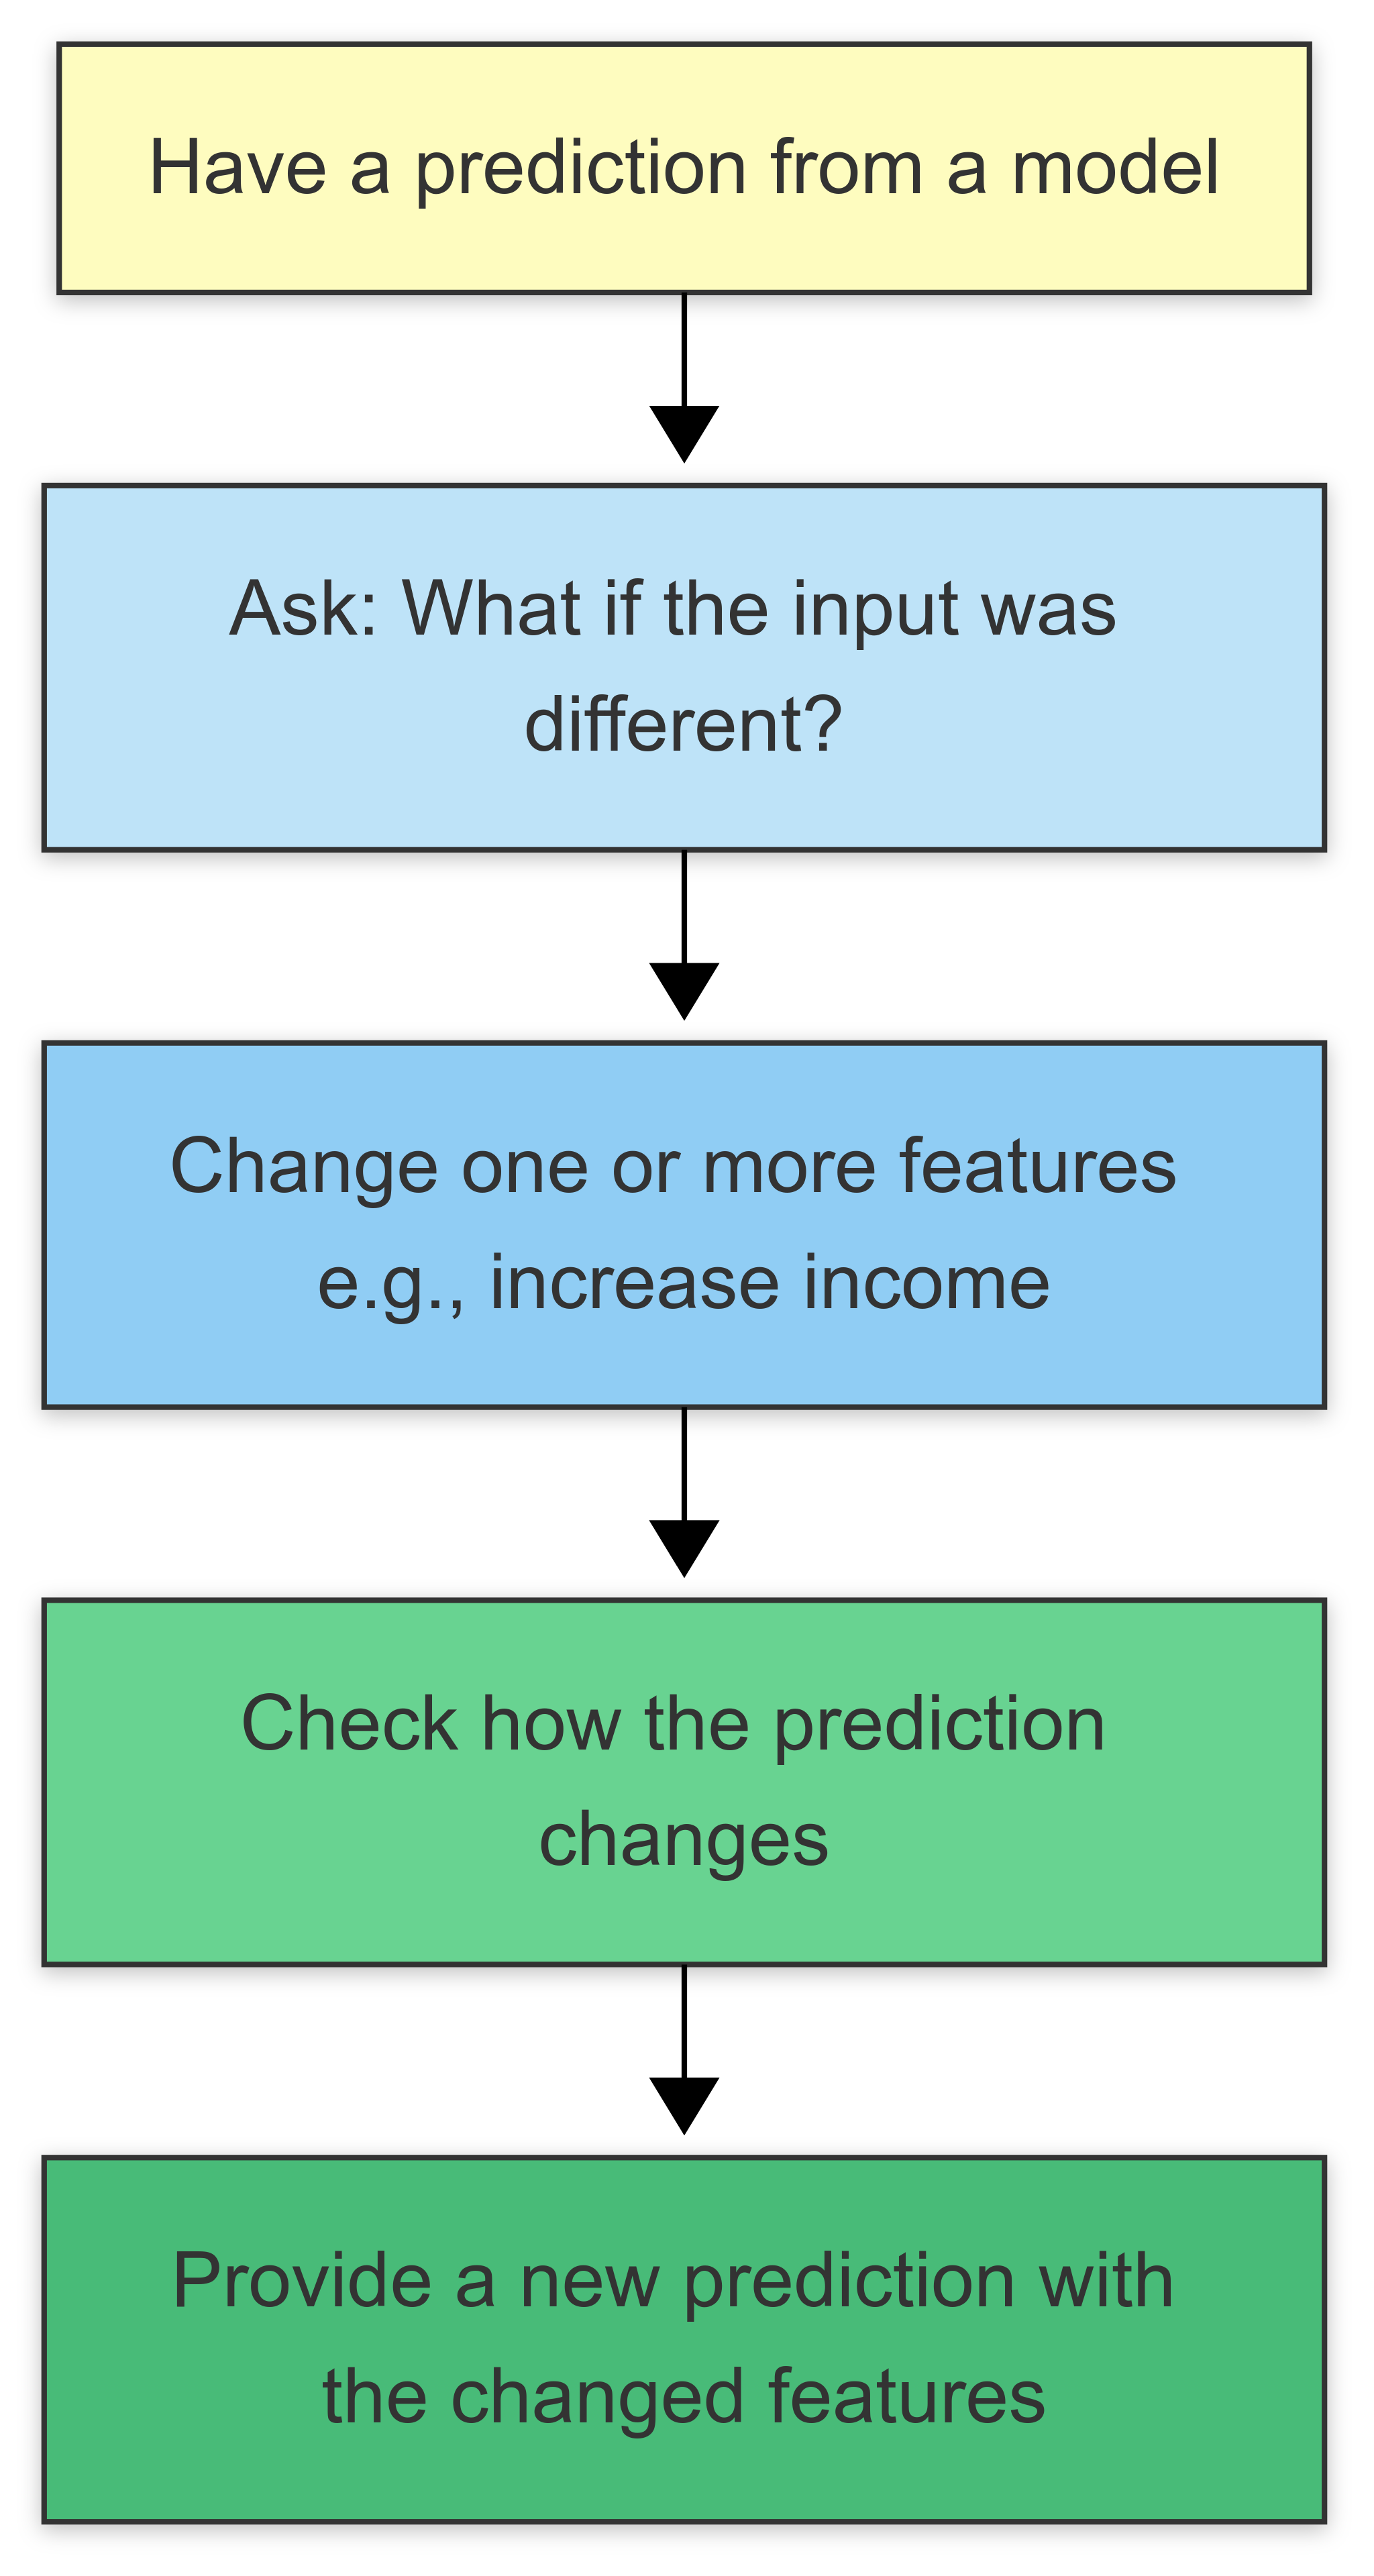


In [ ]:
!pip install dice-ml --quiet

In [ ]:
import dice_ml
from dice_ml import Dice
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Features and target
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Standardize the features (important for NN training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
nn_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, verbose=0)

# Predict and evaluate
y_pred_probs = nn_model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# Initialize DiCE explainer
data_dice = dice_ml.Data(
    dataframe=diabetes_df,
    continuous_features=[col for col in diabetes_df.columns if col != "Outcome"],
    outcome_name="Outcome"
)
model_dice = dice_ml.Model(model=nn_model, backend="TF2")
exp = Dice(data_dice, model_dice)

In [ ]:
# Select an instance to generate counterfactual for (we'll select on positive instance)
y_positive = np.where(rf_model.predict(X_test) == 1)[0]

idx = y_positive[0]
query_instance = X_test.iloc[idx:idx+1]  # Pick any index from test set

print("Actual label:", y_test.iloc[idx])
print("Prediction:", nn_model.predict(query_instance)[0])

# Generate counterfactual explanation
counterfactuals = exp.generate_counterfactuals(query_instance,
                                               total_CFs=1,
                                               desired_class="opposite",
                                               features_to_vary=['Glucose','BloodPressure','Insulin','BMI'],
                                               diversity_weight=0.1
                                              )

# Visualize the counterfactual result
counterfactuals.visualize_as_dataframe(show_only_changes=True)